A Five Month Journey through...
===============================
1. Train and Test Image Stats
2. Image Preprocessing
3. Neural Networks

1. Train and Test Image Stats
=============================

In [1]:
from IPython.core.display import display, HTML
import pandas as pd
import os, glob
from PIL import Image, ImageDraw
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train = pd.DataFrame([[i.split('/')[3],i.split('/')[4],i] for i in sorted(glob.glob('../input/train/*/*.jpg'))])
train.columns = ['type','image','path']
display(train.head(2))
test = pd.DataFrame([[i.split('/')[3],i] for i in sorted(glob.glob('../input/test_stg1/*.jpg'))])
test.columns = ['image','path']
display(test.head(2))

,type,image,path
0,ALB,img_00003.jpg,../input/train/ALB/img_00003.jpg
1,ALB,img_00010.jpg,../input/train/ALB/img_00010.jpg


,image,path
0,img_00005.jpg,../input/test_stg1/img_00005.jpg
1,img_00007.jpg,../input/test_stg1/img_00007.jpg


In [2]:
from PIL import ImageStat
d = {}
for i in range(len(train)):
    im_ = Image.open(train['path'][i])
    d[train['path'][i]] = {'Stats': ImageStat.Stat(im_), 'Size': im_.size}
train['size'] = train['path'].map(lambda x: d[x]['Size'])
train['extrema'] = train['path'].map(lambda x: d[x]['Stats'].extrema)
train['count'] = train['path'].map(lambda x: d[x]['Stats'].count)
train['sum'] = train['path'].map(lambda x: d[x]['Stats'].sum)
train['mean'] = train['path'].map(lambda x: d[x]['Stats'].mean)
train['rms'] = train['path'].map(lambda x: d[x]['Stats'].rms)
train['var'] = train['path'].map(lambda x: d[x]['Stats'].var)
train['stddev'] = train['path'].map(lambda x: d[x]['Stats'].stddev)
train.head(2)

,type,image,path,size,extrema,count,sum,mean,rms,var,stddev
0,ALB,img_00003.jpg,../input/train/ALB/img_00003.jpg,"(1280, 720)","[(0, 255), (0, 255), (0, 255)]","[921600, 921600, 921600]","[96169261.0, 96476463.0, 99916585.0]","[104.35032660590278, 104.683662109375, 108.416...","[116.66508964242921, 114.78135519230894, 116.4...","[2721.7524785174614, 2216.0903871531928, 1798....","[52.1704176571116, 47.07536921951004, 42.40528..."
1,ALB,img_00010.jpg,../input/train/ALB/img_00010.jpg,"(1280, 720)","[(0, 255), (0, 255), (0, 255)]","[921600, 921600, 921600]","[106356118.0, 109989414.0, 112795113.0]","[115.40377387152778, 119.34615234375, 122.3905...","[126.91585089131017, 130.3700204952182, 132.82...","[2789.6021836745595, 2752.838164666028, 2661.8...","[52.81668470923331, 52.46749626831862, 51.5935..."


In [3]:
d = {}
for i in range(len(test)):
    im_ = Image.open(test['path'][i])
    d[test['path'][i]] = {'Stats': ImageStat.Stat(im_), 'Size': im_.size}
test['size'] = test['path'].map(lambda x: d[x]['Size'])
test['extrema'] = test['path'].map(lambda x: d[x]['Stats'].extrema)
test['count'] = test['path'].map(lambda x: d[x]['Stats'].count)
test['sum'] = test['path'].map(lambda x: d[x]['Stats'].sum)
test['mean'] = test['path'].map(lambda x: d[x]['Stats'].mean)
test['rms'] = test['path'].map(lambda x: d[x]['Stats'].rms)
test['var'] = test['path'].map(lambda x: d[x]['Stats'].var)
test['stddev'] = test['path'].map(lambda x: d[x]['Stats'].stddev)
test.head(2)

,image,path,size,extrema,count,sum,mean,rms,var,stddev
0,img_00005.jpg,../input/test_stg1/img_00005.jpg,"(1280, 720)","[(0, 255), (0, 255), (0, 255)]","[921600, 921600, 921600]","[85558136.0, 94486192.0, 98135911.0]","[92.83651909722222, 102.5240798611111, 106.484...","[107.81080814896362, 114.53260958720082, 117.3...","[3004.5510756437325, 2606.531707486678, 2440.7...","[54.813785452600634, 51.05420362209833, 49.404..."
1,img_00007.jpg,../input/test_stg1/img_00007.jpg,"(1280, 720)","[(0, 255), (0, 255), (0, 255)]","[921600, 921600, 921600]","[88679075.0, 90230139.0, 94085075.0]","[96.22295464409723, 97.905966796875, 102.08884...","[108.8813871717257, 109.31906201021577, 111.48...","[2596.2994719992453, 2365.0789843626135, 2006....","[50.95389555273714, 48.632077730265785, 44.798..."


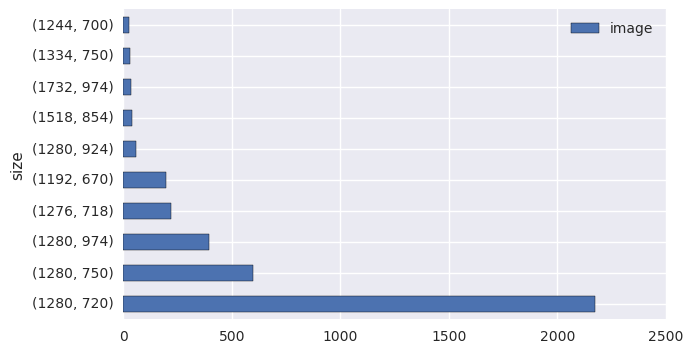

In [4]:
sizes = train.groupby('size', as_index=False)['image'].count()
sizes = sizes.sort_values(by=['image'], ascending=[False])
_ = sizes.plot(kind='barh', y='image', x='size', figsize=(7,4))

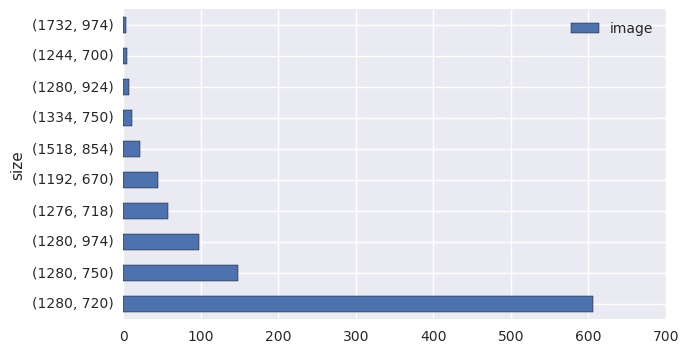

In [5]:
sizes = test.groupby('size', as_index=False)['image'].count()
sizes = sizes.sort_values(by=['image'], ascending=[False])
_ = sizes.plot(kind='barh', y='image', x='size', figsize=(7,4))

2. Image Preprocessing
=======================

In [6]:
from io import StringIO

img_tags = """image	x1	y1	x2	y2
img_06771.jpg	0	348	264	490
img_06481.jpg	0	348	307	507
img_07731.jpg	0	282	453	506
img_02712.jpg	0	336	357	491
img_00997.jpg	0	297	296	528
img_00321.jpg	0	288	223	475
img_05060.jpg	1	316	408	539
img_06919.jpg	1	289	415	512
img_05460.jpg	1	260	243	513
img_03505.jpg	1	273	371	481
img_02308.jpg	1	339	247	599
img_01199.jpg	2	335	226	504
img_01700.jpg	2	292	320	563
img_06920.jpg	2	265	213	430
img_04855.jpg	3	477	506	819
img_04977.jpg	3	298	299	557
img_02387.jpg	3	294	347	625
img_02917.jpg	3	332	248	470
img_05369.jpg	3	304	202	477
img_03057.jpg	4	487	504	812
img_04488.jpg	4	303	432	478
img_01190.jpg	4	605	579	839
img_00365.jpg	6	484	528	814
img_02987.jpg	8	480	503	805
img_06053.jpg	9	300	433	486
img_00184.jpg	9	246	313	390
img_07661.jpg	10	488	493	806
img_02689.jpg	11	348	223	516
img_01298.jpg	12	491	501	814
img_07644.jpg	12	286	459	559
img_00118.jpg	13	249	292	406
img_01638.jpg	17	209	283	439
img_03514.jpg	17	230	388	409
img_04364.jpg	17	300	454	480
img_00641.jpg	21	319	329	573
img_03485.jpg	21	308	465	526
img_07366.jpg	22	340	303	573
img_01340.jpg	26	190	298	482
img_07473.jpg	27	472	502	802
img_02853.jpg	28	302	442	473
img_00217.jpg	31	211	455	477
img_03585.jpg	35	304	498	513
img_01876.jpg	38	351	416	572
img_07624.jpg	38	306	438	526
img_05318.jpg	48	260	338	472
img_06417.jpg	57	301	293	556
img_06145.jpg	61	274	317	509
img_01374.jpg	63	328	440	583
img_04730.jpg	65	314	545	496
img_00607.jpg	70	244	289	470
img_03047.jpg	76	465	199	589
img_02897.jpg	77	303	352	398
img_03086.jpg	78	266	550	469
img_05245.jpg	79	319	412	451
img_03569.jpg	81	350	312	520
img_07107.jpg	84	321	369	453
img_02592.jpg	84	282	249	442
img_05215.jpg	85	138	292	242
img_03622.jpg	86	326	568	525
img_03040.jpg	87	226	368	395
img_07383.jpg	89	334	567	615
img_01678.jpg	90	171	328	395
img_03004.jpg	91	337	409	488
img_06700.jpg	95	179	344	391
img_07340.jpg	96	340	360	509
img_03313.jpg	96	312	416	447
img_05628.jpg	98	343	343	473
img_07109.jpg	99	335	417	497
img_07901.jpg	101	350	421	518
img_03791.jpg	103	524	194	674
img_07904.jpg	103	484	190	647
img_01308.jpg	103	334	569	641
img_02515.jpg	103	597	638	840
img_02958.jpg	103	266	555	425
img_05380.jpg	104	337	573	618
img_06523.jpg	105	458	196	602
img_02579.jpg	105	327	429	467
img_01539.jpg	105	338	395	490
img_02149.jpg	105	358	413	525
img_04759.jpg	106	339	565	617
img_07445.jpg	107	465	202	667
img_05088.jpg	107	320	386	468
img_02450.jpg	107	265	340	514
img_02220.jpg	107	258	546	493
img_04217.jpg	108	352	358	506
img_01905.jpg	108	328	516	501
img_02371.jpg	110	471	382	538
img_03947.jpg	110	317	443	577
img_03782.jpg	110	346	398	484
img_06196.jpg	110	343	598	618
img_01574.jpg	111	135	262	337
img_07272.jpg	111	130	277	320
img_00901.jpg	113	145	283	328
img_06781.jpg	113	376	331	463
img_01498.jpg	113	339	418	491
img_01727.jpg	114	476	376	548
img_04626.jpg	114	336	588	619
img_02626.jpg	114	336	417	486
img_04245.jpg	115	454	187	616
img_06493.jpg	115	464	186	601
img_04771.jpg	115	452	269	688
img_05500.jpg	116	244	453	378
img_00677.jpg	116	326	390	470
img_00466.jpg	117	122	276	344
img_03062.jpg	117	342	418	492
img_01189.jpg	117	337	405	488
img_04082.jpg	119	347	421	503
img_05425.jpg	119	418	357	571
img_02080.jpg	120	462	191	615
img_00136.jpg	120	572	844	868
img_06595.jpg	121	463	184	612
img_02484.jpg	121	373	353	451
img_06903.jpg	122	447	226	601
img_02420.jpg	122	362	354	461
img_06487.jpg	122	360	569	558
img_01759.jpg	123	461	184	599
img_01942.jpg	123	465	189	596
img_02500.jpg	123	314	404	469
img_03160.jpg	123	249	593	529
img_06822.jpg	125	340	380	508
img_05975.jpg	125	198	542	459
img_05104.jpg	126	122	259	306
img_00269.jpg	126	396	290	468
img_07119.jpg	126	301	419	457
img_02058.jpg	127	79	337	298
img_03756.jpg	128	313	410	465
img_00248.jpg	130	562	815	878
img_01323.jpg	130	354	567	565
img_02067.jpg	130	350	384	496
img_02624.jpg	131	455	190	599
img_04545.jpg	131	145	268	309
img_03388.jpg	131	349	392	504
img_01898.jpg	132	271	614	502
img_02087.jpg	133	525	173	572
img_05576.jpg	134	602	307	668
img_06075.jpg	135	103	247	334
img_02173.jpg	135	335	472	474
img_03063.jpg	135	356	595	547
img_05851.jpg	136	239	442	376
img_07017.jpg	136	292	609	537
img_00743.jpg	136	301	603	536
img_02772.jpg	136	324	425	452
img_03675.jpg	137	640	736	870
img_03668.jpg	137	318	426	463
img_05024.jpg	137	338	585	519
img_01363.jpg	138	559	840	870
img_03168.jpg	140	529	186	600
img_06763.jpg	141	267	596	423
img_04434.jpg	142	452	209	690
img_05507.jpg	143	398	290	485
img_04444.jpg	143	309	455	468
img_02474.jpg	143	305	433	423
img_06374.jpg	144	353	616	590
img_06797.jpg	145	253	304	473
img_05086.jpg	146	141	252	306
img_07218.jpg	148	310	491	455
img_07396.jpg	149	376	351	467
img_06722.jpg	149	385	317	474
img_05179.jpg	150	292	498	459
img_07566.jpg	150	369	326	457
img_07447.jpg	151	383	310	477
img_07773.jpg	152	357	378	471
img_07195.jpg	152	571	816	875
img_03938.jpg	152	342	458	508
img_00983.jpg	152	321	433	424
img_02953.jpg	152	340	434	443
img_07640.jpg	153	338	362	432
img_07814.jpg	153	289	488	462
img_03387.jpg	153	383	309	472
img_02295.jpg	153	327	416	487
img_00542.jpg	153	216	486	493
img_00019.jpg	154	399	314	474
img_04650.jpg	155	549	513	812
img_02586.jpg	155	281	505	471
img_06185.jpg	155	311	502	471
img_02777.jpg	155	66	356	285
img_01763.jpg	155	326	302	510
img_01006.jpg	156	361	392	481
img_00208.jpg	156	195	505	315
img_01129.jpg	156	305	500	462
img_05102.jpg	156	311	435	479
img_00796.jpg	157	262	619	400
img_05913.jpg	157	363	628	564
img_00348.jpg	157	328	503	437
img_07057.jpg	158	295	508	479
img_05713.jpg	158	291	504	478
img_06509.jpg	158	387	403	473
img_00279.jpg	158	325	662	486
img_02936.jpg	161	333	409	484
img_04535.jpg	162	442	226	611
img_01509.jpg	162	252	283	473
img_00222.jpg	162	395	403	477
img_04121.jpg	164	417	294	456
img_01278.jpg	165	324	494	463
img_00356.jpg	165	303	506	456
img_06824.jpg	165	330	474	456
img_01850.jpg	166	317	571	463
img_04713.jpg	167	386	343	475
img_06157.jpg	167	70	336	302
img_06729.jpg	167	323	461	467
img_01886.jpg	168	389	424	482
img_00903.jpg	169	438	228	572
img_03775.jpg	169	356	393	483
img_05101.jpg	169	57	344	307
img_00502.jpg	169	192	509	325
img_06220.jpg	170	555	507	800
img_00193.jpg	170	333	350	423
img_02492.jpg	171	252	319	413
img_00727.jpg	171	391	294	449
img_06452.jpg	171	27	564	223
img_02378.jpg	171	299	485	433
img_00055.jpg	172	373	381	484
img_06132.jpg	173	31	566	221
img_07609.jpg	173	255	590	514
img_02525.jpg	173	97	409	427
img_07059.jpg	173	272	320	473
img_02944.jpg	174	451	230	581
img_04951.jpg	174	342	350	448
img_02673.jpg	174	386	630	605
img_07055.jpg	174	268	640	468
img_00344.jpg	175	419	356	483
img_04792.jpg	176	43	335	301
img_01197.jpg	177	269	324	420
img_01241.jpg	177	305	420	475
img_02447.jpg	178	58	340	278
img_00214.jpg	179	30	568	224
img_04619.jpg	179	212	586	408
img_03680.jpg	180	359	385	467
img_05886.jpg	181	358	386	482
img_01911.jpg	181	372	386	466
img_05214.jpg	181	60	351	285
img_02491.jpg	181	422	324	478
img_05165.jpg	181	334	411	526
img_03369.jpg	183	42	368	323
img_04528.jpg	183	326	282	490
img_04817.jpg	183	30	568	224
img_05633.jpg	183	310	632	521
img_07368.jpg	184	367	403	475
img_00378.jpg	184	323	668	493
img_00957.jpg	185	43	395	245
img_05363.jpg	185	408	305	469
img_03127.jpg	186	340	411	455
img_03351.jpg	187	551	512	828
img_02361.jpg	187	54	343	309
img_07437.jpg	187	414	346	491
img_01380.jpg	187	238	577	441
img_06512.jpg	188	38	396	228
img_03372.jpg	188	161	509	576
img_05663.jpg	189	373	359	463
img_05765.jpg	189	398	426	477
img_06012.jpg	189	349	544	482
img_06418.jpg	190	326	456	468
img_07684.jpg	191	41	399	232
img_00722.jpg	191	367	417	454
img_05745.jpg	191	202	406	461
img_02986.jpg	191	171	650	503
img_00536.jpg	191	196	564	412
img_05226.jpg	192	116	643	282
img_00807.jpg	192	145	478	582
img_06175.jpg	193	34	326	287
img_02396.jpg	193	44	375	216
img_07208.jpg	193	294	414	490
img_06094.jpg	193	346	485	474
img_00696.jpg	193	184	557	415
img_07435.jpg	194	429	383	501
img_02408.jpg	194	32	406	215
img_06633.jpg	194	78	354	288
img_05116.jpg	195	271	630	514
img_06576.jpg	195	339	490	476
img_01776.jpg	195	341	433	505
img_00888.jpg	195	232	326	426
img_01668.jpg	195	282	296	490
img_00187.jpg	196	361	411	506
img_03851.jpg	196	44	365	221
img_00684.jpg	196	366	394	476
img_01375.jpg	196	271	635	537
img_06500.jpg	196	110	413	428
img_06854.jpg	196	364	406	473
img_04174.jpg	197	332	553	478
img_01578.jpg	197	413	384	488
img_04355.jpg	197	364	398	470
img_04627.jpg	197	338	496	472
img_07074.jpg	197	366	408	474
img_06284.jpg	197	338	572	475
img_02554.jpg	197	254	321	450
img_00632.jpg	198	34	394	219
img_04471.jpg	198	32	372	224
img_05108.jpg	198	153	502	587
img_01858.jpg	199	41	391	220
img_07730.jpg	199	373	399	483
img_05816.jpg	199	367	398	476
img_04283.jpg	199	350	645	500
img_05648.jpg	200	39	378	217
img_00810.jpg	200	252	329	424
img_04280.jpg	200	293	408	493
img_04158.jpg	200	217	612	420
img_05159.jpg	201	39	414	228
img_04070.jpg	201	219	450	356
img_05152.jpg	201	356	395	470
img_01415.jpg	201	399	439	478
img_00713.jpg	202	412	350	491
img_03215.jpg	202	29	339	280
img_07394.jpg	202	43	370	216
img_03106.jpg	202	45	376	220
img_00891.jpg	202	156	650	521
img_03407.jpg	202	368	403	474
img_05662.jpg	202	366	399	475
img_03259.jpg	202	344	481	507
img_01299.jpg	202	341	622	549
img_02338.jpg	203	58	377	228
img_07443.jpg	203	36	377	225
img_05041.jpg	203	361	396	469
img_00439.jpg	203	255	623	429
img_01130.jpg	204	54	375	218
img_00295.jpg	204	258	340	427
img_07081.jpg	204	41	374	223
img_02112.jpg	204	48	294	327
img_01128.jpg	204	392	346	453
img_05758.jpg	205	39	377	230
img_01085.jpg	205	52	389	215
img_04893.jpg	205	153	512	325
img_03061.jpg	206	376	368	478
img_06372.jpg	206	56	376	213
img_04969.jpg	206	258	529	407
img_07098.jpg	206	277	535	514
img_00317.jpg	206	53	388	213
img_04968.jpg	207	43	383	215
img_02888.jpg	207	30	375	214
img_06344.jpg	207	43	382	230
img_04859.jpg	207	291	595	474
img_05579.jpg	208	229	732	387
img_02178.jpg	208	232	330	424
img_03323.jpg	208	62	377	217
img_04153.jpg	208	54	375	217
img_05655.jpg	208	410	445	482
img_02910.jpg	208	309	502	452
img_06562.jpg	209	44	391	231
img_01680.jpg	209	53	398	218
img_03293.jpg	209	150	505	288
img_02623.jpg	209	51	380	211
img_07056.jpg	210	549	497	806
img_05727.jpg	210	50	386	217
img_03845.jpg	210	42	376	216
img_01110.jpg	210	31	390	229
img_03143.jpg	210	54	379	212
img_07559.jpg	210	374	350	517
img_07226.jpg	210	396	457	482
img_01003.jpg	210	211	421	679
img_05077.jpg	211	44	390	224
img_01454.jpg	211	328	547	489
img_03262.jpg	212	419	397	489
img_05027.jpg	212	32	368	221
img_02386.jpg	212	48	368	222
img_02578.jpg	212	64	313	279
img_01675.jpg	212	399	448	480
img_00206.jpg	213	47	375	218
img_02737.jpg	213	342	427	448
img_00276.jpg	213	257	617	418
img_06407.jpg	213	362	410	474
img_07300.jpg	214	250	347	438
img_02229.jpg	214	45	374	231
img_07668.jpg	214	44	376	222
img_00923.jpg	214	222	403	684
img_02263.jpg	215	51	303	305
img_05252.jpg	215	205	389	679
img_03050.jpg	216	385	354	474
img_03932.jpg	216	54	378	215
img_02928.jpg	216	416	347	474
img_06833.jpg	216	55	380	211
img_05075.jpg	216	48	370	221
img_04594.jpg	216	358	401	474
img_07732.jpg	217	55	382	254
img_05480.jpg	217	319	438	436
img_02343.jpg	217	210	653	421
img_04098.jpg	218	35	387	238
img_01636.jpg	218	125	589	264
img_04385.jpg	218	326	657	476
img_03590.jpg	219	395	467	490
img_00583.jpg	219	209	401	669
img_01881.jpg	220	196	635	381
img_05332.jpg	220	39	389	228
img_01796.jpg	220	112	576	267
img_05043.jpg	221	129	686	419
img_06338.jpg	221	200	521	383
img_01079.jpg	221	125	605	239
img_02488.jpg	221	45	375	215
img_06364.jpg	221	363	410	466
img_04633.jpg	222	164	700	385
img_07228.jpg	222	50	386	234
img_03600.jpg	222	44	407	272
img_06714.jpg	222	410	416	488
img_00918.jpg	222	309	556	457
img_03161.jpg	223	391	392	470
img_01756.jpg	223	43	388	232
img_07471.jpg	223	414	356	473
img_00287.jpg	223	403	459	504
img_01520.jpg	224	337	436	427
img_07302.jpg	224	268	344	363
img_02757.jpg	224	221	446	686
img_02103.jpg	224	216	698	419
img_05329.jpg	225	396	474	505
img_00689.jpg	225	274	518	436
img_07015.jpg	225	167	411	610
img_00811.jpg	226	411	414	487
img_05166.jpg	226	359	432	471
img_05521.jpg	226	303	655	457
img_01343.jpg	226	170	435	642
img_02109.jpg	227	312	490	444
img_01489.jpg	227	425	362	584
img_00023.jpg	227	368	408	515
img_01986.jpg	228	211	633	376
img_03148.jpg	228	235	630	388
img_05588.jpg	228	408	387	486
img_03216.jpg	228	271	534	521
img_02604.jpg	229	296	340	389
img_04954.jpg	229	56	595	185
img_02449.jpg	229	361	407	467
img_00961.jpg	230	337	454	409
img_02438.jpg	230	397	431	487
img_01934.jpg	232	123	554	240
img_04684.jpg	232	394	433	507
img_03183.jpg	232	425	374	478
img_00296.jpg	233	420	421	483
img_03385.jpg	234	201	626	381
img_00247.jpg	234	213	639	381
img_04187.jpg	234	367	404	435
img_07836.jpg	234	490	408	617
img_04018.jpg	234	47	377	204
img_01531.jpg	234	295	609	504
img_04367.jpg	235	6	533	173
img_02351.jpg	235	429	378	478
img_02557.jpg	236	232	631	393
img_06194.jpg	236	402	402	481
img_05143.jpg	236	394	435	501
img_03327.jpg	236	396	434	499
img_01844.jpg	236	267	577	450
img_05986.jpg	236	225	471	713
img_05887.jpg	237	196	729	384
img_07078.jpg	237	68	602	197
img_05495.jpg	237	401	502	497
img_04688.jpg	238	406	479	510
img_06841.jpg	238	328	631	511
img_02341.jpg	239	305	458	484
img_05894.jpg	239	292	602	458
img_07378.jpg	239	288	432	737
img_00771.jpg	239	125	412	284
img_00883.jpg	239	387	446	492
img_01916.jpg	240	225	649	388
img_04666.jpg	240	415	384	466
img_01300.jpg	240	435	449	496
img_02036.jpg	240	422	438	502
img_01573.jpg	240	399	511	515
img_00955.jpg	240	396	432	504
img_07852.jpg	240	402	437	504
img_00451.jpg	241	233	393	395
img_01878.jpg	241	424	424	524
img_07014.jpg	241	66	597	191
img_04542.jpg	241	336	386	444
img_06721.jpg	241	410	365	478
img_06796.jpg	241	361	433	442
img_02247.jpg	241	277	651	447
img_05680.jpg	241	393	432	505
img_06163.jpg	242	159	643	365
img_05019.jpg	242	203	640	388
img_02686.jpg	242	423	451	501
img_02794.jpg	242	56	611	181
img_00351.jpg	242	432	460	481
img_06027.jpg	242	289	610	463
img_02165.jpg	242	345	492	477
img_03007.jpg	242	398	433	509
img_01819.jpg	243	60	610	180
img_03480.jpg	243	415	397	481
img_01385.jpg	243	394	435	503
img_00770.jpg	243	440	397	499
img_03286.jpg	244	425	429	509
img_07530.jpg	244	398	430	503
img_07557.jpg	244	437	466	512
img_01282.jpg	245	334	453	406
img_07765.jpg	245	397	432	505
img_04591.jpg	245	270	588	429
img_04087.jpg	245	405	486	512
img_03997.jpg	245	444	454	516
img_06554.jpg	246	192	553	338
img_00396.jpg	246	67	617	195
img_03575.jpg	246	417	498	489
img_05744.jpg	246	399	428	485
img_06271.jpg	246	51	520	185
img_00286.jpg	246	384	470	487
img_01357.jpg	247	63	615	179
img_01368.jpg	247	412	388	497
img_03787.jpg	247	164	723	480
img_03651.jpg	248	411	408	481
img_07577.jpg	248	405	486	512
img_02633.jpg	248	384	419	522
img_03654.jpg	248	398	440	499
img_03984.jpg	249	728	692	915
img_07162.jpg	249	422	428	484
img_01206.jpg	249	52	602	190
img_01779.jpg	249	392	449	505
img_05784.jpg	249	116	415	273
img_03509.jpg	250	189	469	421
img_04148.jpg	250	399	438	508
img_04760.jpg	250	440	478	518
img_06847.jpg	251	555	502	803
img_01334.jpg	251	416	462	482
img_03017.jpg	251	56	615	190
img_05667.jpg	251	407	406	479
img_01166.jpg	251	388	497	818
img_03305.jpg	252	566	522	808
img_07540.jpg	252	59	607	188
img_01455.jpg	252	424	436	507
img_06301.jpg	252	356	401	439
img_06406.jpg	252	384	498	491
img_03521.jpg	253	207	744	377
img_06025.jpg	253	150	414	606
img_00790.jpg	253	57	590	177
img_06875.jpg	253	396	442	507
img_01207.jpg	254	61	605	177
img_01615.jpg	254	287	444	478
img_04527.jpg	255	413	466	494
img_05477.jpg	255	409	405	495
img_02128.jpg	255	401	468	487
img_02221.jpg	256	403	400	474
img_02514.jpg	257	243	627	358
img_05674.jpg	257	275	402	468
img_02114.jpg	258	551	500	806
img_03112.jpg	258	228	604	360
img_03145.jpg	258	343	424	400
img_07826.jpg	258	177	605	340
img_07488.jpg	258	52	606	188
img_00015.jpg	258	327	460	438
img_01950.jpg	258	164	662	364
img_02938.jpg	258	160	657	379
img_03184.jpg	258	225	726	421
img_03962.jpg	259	208	638	368
img_00638.jpg	259	402	434	494
img_00793.jpg	259	73	619	229
img_04878.jpg	259	330	464	441
img_02630.jpg	259	67	611	190
img_04059.jpg	259	342	405	450
img_06583.jpg	260	335	463	413
img_01152.jpg	261	410	444	479
img_01645.jpg	261	186	591	327
img_06279.jpg	261	325	467	422
img_06190.jpg	261	412	442	480
img_07477.jpg	262	70	609	201
img_04500.jpg	262	191	459	345
img_00823.jpg	262	389	424	484
img_02063.jpg	262	331	478	430
img_06096.jpg	262	49	600	176
img_01861.jpg	262	341	503	487
img_00440.jpg	262	402	414	497
img_04281.jpg	262	407	399	477
img_02260.jpg	263	191	629	404
img_02996.jpg	263	168	455	385
img_05315.jpg	263	323	466	427
img_06664.jpg	263	416	451	484
img_00436.jpg	263	414	416	477
img_01704.jpg	263	406	409	476
img_06200.jpg	264	317	467	447
img_04289.jpg	264	269	477	750
img_00225.jpg	264	147	621	360
img_04938.jpg	264	155	617	355
img_07242.jpg	265	425	424	478
img_06307.jpg	265	360	434	434
img_04668.jpg	265	398	423	489
img_05872.jpg	266	204	793	373
img_04868.jpg	266	42	423	438
img_05431.jpg	266	166	623	361
img_07306.jpg	267	134	446	619
img_01654.jpg	267	393	464	467
img_04692.jpg	267	303	672	464
img_00939.jpg	267	157	695	388
img_01338.jpg	268	237	654	389
img_02414.jpg	268	335	494	445
img_04304.jpg	268	163	617	353
img_05974.jpg	268	165	619	359
img_00361.jpg	269	176	433	423
img_04718.jpg	269	299	488	773
img_04177.jpg	270	192	638	351
img_05491.jpg	270	35	601	187
img_07499.jpg	270	407	424	476
img_02457.jpg	270	403	489	521
img_02840.jpg	270	160	618	358
img_05832.jpg	271	357	478	467
img_00366.jpg	271	774	684	921
img_05566.jpg	271	231	349	395
img_07441.jpg	272	423	448	491
img_05128.jpg	272	389	436	466
img_07517.jpg	272	390	423	474
img_07804.jpg	272	155	618	356
img_05227.jpg	273	67	384	186
img_00037.jpg	273	262	390	439
img_04927.jpg	273	262	414	423
img_05796.jpg	273	91	404	238
img_05110.jpg	273	154	617	359
img_03842.jpg	274	140	678	399
img_01218.jpg	274	164	614	358
img_06695.jpg	275	309	546	441
img_04093.jpg	275	383	429	461
img_03037.jpg	275	151	519	330
img_07734.jpg	275	161	618	360
img_01234.jpg	276	152	619	359
img_05402.jpg	276	158	618	359
img_00774.jpg	276	358	531	823
img_01572.jpg	277	550	518	811
img_04950.jpg	277	233	606	366
img_05453.jpg	277	87	569	177
img_05836.jpg	278	237	634	371
img_04023.jpg	278	392	404	479
img_06126.jpg	278	303	666	476
img_00561.jpg	278	241	634	371
img_05090.jpg	278	212	402	383
img_03911.jpg	278	648	888	893
img_04048.jpg	278	155	598	318
img_02206.jpg	278	154	618	358
img_04802.jpg	279	421	403	477
img_02967.jpg	279	158	623	359
img_06143.jpg	280	50	616	200
img_03948.jpg	280	107	670	258
img_01093.jpg	281	416	502	492
img_00352.jpg	281	272	456	484
img_07369.jpg	282	155	832	410
img_06064.jpg	283	90	632	209
img_01606.jpg	283	348	702	488
img_05462.jpg	283	408	516	510
img_03090.jpg	284	437	457	492
img_03176.jpg	286	344	429	410
img_04911.jpg	286	412	473	480
img_01623.jpg	286	96	665	260
img_02195.jpg	286	384	482	753
img_00834.jpg	287	283	465	399
img_05823.jpg	288	175	440	492
img_00231.jpg	288	372	558	829
img_04513.jpg	289	369	491	468
img_03599.jpg	289	398	471	486
img_06835.jpg	289	353	512	578
img_03808.jpg	290	29	647	180
img_02905.jpg	290	343	532	483
img_00806.jpg	290	394	459	482
img_03913.jpg	291	216	503	399
img_07854.jpg	291	404	502	526
img_03429.jpg	292	418	476	481
img_00329.jpg	292	71	411	232
img_04904.jpg	293	223	488	367
img_03700.jpg	293	238	624	381
img_07461.jpg	294	380	389	452
img_00678.jpg	294	404	529	503
img_00732.jpg	295	385	471	743
img_00843.jpg	296	392	516	485
img_04742.jpg	296	93	413	217
img_03880.jpg	297	266	460	423
img_01304.jpg	297	396	444	480
img_01693.jpg	297	442	444	492
img_04852.jpg	297	207	461	352
img_03798.jpg	298	194	518	418
img_06062.jpg	298	191	504	399
img_02133.jpg	298	413	491	479
img_06382.jpg	298	322	760	521
img_02008.jpg	299	407	499	486
img_05852.jpg	299	158	684	393
img_05039.jpg	299	227	523	412
img_03125.jpg	299	202	494	395
img_00301.jpg	299	228	676	337
img_00353.jpg	299	268	385	440
img_07864.jpg	299	334	746	521
img_07608.jpg	300	111	383	274
img_01127.jpg	300	238	499	382
img_06442.jpg	300	406	537	512
img_01042.jpg	300	405	531	495
img_04350.jpg	301	387	497	496
img_00525.jpg	301	212	500	385
img_07511.jpg	301	167	689	311
img_05375.jpg	302	135	662	355
img_07092.jpg	302	179	466	341
img_05583.jpg	302	181	503	386
img_07290.jpg	302	550	779	750
img_02069.jpg	303	279	414	488
img_03381.jpg	303	201	552	417
img_04303.jpg	303	404	483	485
img_02362.jpg	303	346	417	411
img_06594.jpg	303	262	375	450
img_07735.jpg	303	337	470	587
img_02254.jpg	303	413	477	477
img_06244.jpg	303	408	531	515
img_07620.jpg	303	317	485	793
img_01047.jpg	304	170	523	300
img_02025.jpg	304	406	492	483
img_01271.jpg	304	264	389	472
img_00415.jpg	304	415	481	476
img_07395.jpg	304	114	643	320
img_05223.jpg	304	335	764	523
img_00372.jpg	305	407	469	484
img_03094.jpg	305	79	646	335
img_01866.jpg	305	332	761	520
img_05560.jpg	306	148	678	395
img_03431.jpg	306	413	491	485
img_04598.jpg	306	403	505	496
img_07377.jpg	306	160	501	291
img_01243.jpg	306	198	647	416
img_07595.jpg	306	422	463	667
img_03646.jpg	306	332	750	519
img_03525.jpg	307	153	641	348
img_03535.jpg	307	154	677	364
img_01990.jpg	308	124	467	307
img_03612.jpg	308	415	508	485
img_06749.jpg	308	197	525	432
img_05206.jpg	308	400	490	485
img_07118.jpg	308	415	507	493
img_05478.jpg	308	304	510	559
img_05092.jpg	308	334	763	521
img_04012.jpg	308	334	747	521
img_04769.jpg	308	332	780	530
img_01558.jpg	309	172	707	384
img_04874.jpg	309	228	579	357
img_03546.jpg	309	409	543	507
img_02752.jpg	309	412	539	518
img_04989.jpg	309	39	400	208
img_03356.jpg	310	173	682	386
img_05781.jpg	310	136	652	386
img_00154.jpg	311	394	487	496
img_02189.jpg	311	145	688	395
img_01440.jpg	311	335	491	751
img_03243.jpg	311	328	744	523
img_05382.jpg	312	454	434	579
img_05562.jpg	312	214	529	406
img_06518.jpg	312	179	479	300
img_06591.jpg	312	211	544	390
img_05020.jpg	312	302	494	527
img_02340.jpg	312	197	510	400
img_04319.jpg	312	404	493	649
img_07227.jpg	312	338	746	522
img_04495.jpg	312	334	753	526
img_02052.jpg	313	405	508	473
img_07207.jpg	313	147	483	327
img_05707.jpg	313	418	500	499
img_01021.jpg	313	211	501	403
img_06439.jpg	313	204	461	339
img_07779.jpg	313	50	694	172
img_05980.jpg	314	467	497	538
img_07789.jpg	314	222	511	404
img_07153.jpg	314	185	456	326
img_07489.jpg	314	204	506	420
img_06319.jpg	314	451	473	526
img_04778.jpg	314	442	678	696
img_07018.jpg	314	419	514	486
img_03917.jpg	314	332	747	517
img_04517.jpg	315	394	734	537
img_07651.jpg	315	178	685	392
img_07914.jpg	315	213	594	385
img_06578.jpg	315	331	749	515
img_03797.jpg	316	220	471	372
img_04273.jpg	316	352	511	483
img_03902.jpg	317	78	495	208
img_07222.jpg	317	204	458	314
img_03430.jpg	317	387	527	470
img_05414.jpg	317	567	775	750
img_06532.jpg	317	419	527	503
img_00851.jpg	317	414	585	469
img_06252.jpg	318	169	684	405
img_04848.jpg	318	61	439	164
img_01246.jpg	318	160	678	402
img_06437.jpg	319	161	670	386
img_03432.jpg	319	431	525	493
img_07406.jpg	319	417	505	487
img_05923.jpg	319	412	547	515
img_01175.jpg	319	330	753	516
img_06347.jpg	320	185	505	403
img_04987.jpg	320	191	576	342
img_03879.jpg	320	188	504	399
img_04882.jpg	320	227	531	356
img_06645.jpg	320	415	500	518
img_02610.jpg	320	397	482	461
img_01914.jpg	321	400	509	482
img_02576.jpg	321	191	580	440
img_05704.jpg	321	327	752	522
img_04040.jpg	322	406	504	523
img_06915.jpg	322	407	501	521
img_04729.jpg	322	422	501	519
img_01854.jpg	322	316	459	556
img_01883.jpg	323	395	513	539
img_05523.jpg	324	217	575	389
img_02225.jpg	324	373	599	621
img_06464.jpg	324	410	491	486
img_02647.jpg	324	411	528	509
img_01074.jpg	325	166	549	303
img_00369.jpg	325	398	504	452
img_07210.jpg	325	411	493	484
img_01507.jpg	326	128	625	441
img_05373.jpg	326	6	594	96
img_01559.jpg	326	394	473	478
img_02346.jpg	327	409	514	530
img_01804.jpg	327	173	670	380
img_04524.jpg	327	390	504	537
img_01682.jpg	327	230	566	357
img_01712.jpg	327	396	677	580
img_04682.jpg	328	143	865	421
img_01354.jpg	328	387	461	523
img_00754.jpg	329	255	675	382
img_06104.jpg	329	209	556	367
img_01185.jpg	330	414	570	502
img_05344.jpg	330	412	537	506
img_05141.jpg	330	399	628	485
img_03991.jpg	331	199	590	383
img_07298.jpg	331	133	627	439
img_02605.jpg	331	225	563	359
img_05695.jpg	331	378	664	677
img_00539.jpg	331	364	591	559
img_06316.jpg	331	402	541	519
img_01153.jpg	331	308	459	505
img_00653.jpg	332	4	627	111
img_04092.jpg	332	174	665	384
img_07117.jpg	332	251	661	369
img_03642.jpg	332	371	477	514
img_00565.jpg	332	377	553	575
img_06952.jpg	332	405	575	484
img_01814.jpg	332	413	594	464
img_02019.jpg	333	70	639	343
img_06215.jpg	333	72	643	333
img_03644.jpg	333	406	510	532
img_04377.jpg	333	246	570	346
img_07134.jpg	333	184	631	373
img_05131.jpg	333	220	569	368
img_07922.jpg	333	435	588	510
img_02662.jpg	334	197	559	374
img_03363.jpg	334	381	493	454
img_05294.jpg	334	412	564	486
img_06818.jpg	334	388	475	477
img_07048.jpg	335	381	572	495
img_05757.jpg	335	411	509	462
img_03022.jpg	335	430	599	507
img_02326.jpg	336	250	652	349
img_02053.jpg	336	406	539	522
img_03035.jpg	336	81	652	178
img_06156.jpg	336	55	845	254
img_06209.jpg	336	405	537	488
img_04060.jpg	336	406	606	483
img_02276.jpg	337	409	503	487
img_06961.jpg	337	212	663	361
img_02940.jpg	337	251	466	592
img_00433.jpg	337	417	609	506
img_04780.jpg	338	376	483	497
img_07041.jpg	338	256	622	357
img_04628.jpg	338	402	545	498
img_01492.jpg	338	64	837	260
img_04028.jpg	338	393	624	636
img_03133.jpg	338	402	606	466
img_02528.jpg	338	404	583	478
img_03164.jpg	339	386	528	473
img_05093.jpg	339	84	654	345
img_00470.jpg	339	346	556	528
img_06623.jpg	339	392	535	485
img_02259.jpg	340	515	938	749
img_04973.jpg	340	3	611	179
img_01734.jpg	340	258	671	346
img_05884.jpg	340	36	683	215
img_07775.jpg	340	369	552	507
img_03395.jpg	340	418	610	469
img_07709.jpg	341	245	694	344
img_05135.jpg	341	0	629	126
img_02784.jpg	341	375	440	518
img_01691.jpg	341	379	616	513
img_07541.jpg	341	379	621	516
img_04693.jpg	341	428	573	497
img_03076.jpg	341	431	587	509
img_01072.jpg	342	383	522	530
img_04090.jpg	342	0	581	94
img_01247.jpg	342	264	649	355
img_03827.jpg	342	228	659	343
img_01817.jpg	342	400	557	496
img_03649.jpg	342	365	585	428
img_06087.jpg	342	432	579	495
img_05868.jpg	343	125	640	324
img_01992.jpg	343	129	599	365
img_03524.jpg	343	40	742	185
img_03589.jpg	343	155	597	383
img_01865.jpg	343	250	663	347
img_06396.jpg	343	376	509	478
img_06234.jpg	343	359	563	553
img_06687.jpg	343	413	508	508
img_07403.jpg	343	401	528	529
img_07388.jpg	343	385	696	592
img_04526.jpg	343	375	622	503
img_01656.jpg	343	437	602	501
img_05031.jpg	344	438	528	496
img_01353.jpg	344	437	545	507
img_00733.jpg	344	413	586	496
img_05133.jpg	344	390	505	480
img_04371.jpg	344	373	505	480
img_00545.jpg	345	447	514	523
img_07698.jpg	345	402	516	512
img_05057.jpg	345	224	578	360
img_06999.jpg	345	72	646	321
img_00871.jpg	345	390	552	501
img_04363.jpg	345	404	505	578
img_00434.jpg	345	431	595	498
img_03904.jpg	346	241	678	357
img_06735.jpg	346	383	492	491
img_06758.jpg	346	260	673	348
img_05550.jpg	346	76	645	312
img_03345.jpg	346	387	497	475
img_06644.jpg	346	405	599	508
img_03568.jpg	347	400	545	489
img_05783.jpg	347	366	550	506
img_05762.jpg	348	569	820	807
img_06060.jpg	348	335	558	411
img_05237.jpg	348	133	650	362
img_03713.jpg	348	453	523	540
img_04046.jpg	348	415	569	496
img_04853.jpg	348	391	536	495
img_00412.jpg	348	432	585	500
img_05231.jpg	349	587	649	738
img_03706.jpg	349	378	506	527
img_02886.jpg	349	240	659	341
img_04446.jpg	349	263	663	362
img_00535.jpg	349	396	558	497
img_00815.jpg	349	392	536	502
img_06262.jpg	349	379	583	487
img_04936.jpg	349	415	500	489
img_03409.jpg	349	305	498	513
img_04556.jpg	349	432	586	500
img_00305.jpg	349	411	605	507
img_06760.jpg	350	51	517	186
img_02801.jpg	350	442	513	531
img_02296.jpg	350	371	437	521
img_03541.jpg	350	349	559	551
img_07613.jpg	350	380	617	508
img_03699.jpg	351	377	439	524
img_02629.jpg	351	395	523	465
img_06767.jpg	351	117	667	368
img_01401.jpg	351	354	516	439
img_07178.jpg	351	2	617	115
img_01652.jpg	351	223	655	377
img_07309.jpg	351	252	1036	532
img_04420.jpg	351	403	535	489
img_01264.jpg	351	397	522	491
img_06786.jpg	352	569	967	745
img_04163.jpg	352	396	502	496
img_01346.jpg	352	307	466	492
img_07571.jpg	352	310	686	522
img_03753.jpg	352	453	539	528
img_04837.jpg	353	598	1015	751
img_02046.jpg	353	391	525	494
img_01364.jpg	353	403	521	541
img_00156.jpg	353	231	670	369
img_06897.jpg	353	384	622	512
img_04224.jpg	353	382	622	508
img_06336.jpg	353	377	625	517
img_07655.jpg	353	415	510	495
img_03096.jpg	353	402	589	513
img_05255.jpg	353	401	536	491
img_01418.jpg	353	436	586	498
img_00245.jpg	354	568	1012	774
img_05022.jpg	354	390	525	474
img_03593.jpg	354	111	502	295
img_01810.jpg	354	252	668	347
img_07315.jpg	354	401	553	498
img_03367.jpg	354	400	537	520
img_06226.jpg	354	362	561	493
img_05834.jpg	354	436	578	495
img_05943.jpg	354	442	586	497
img_06350.jpg	355	89	734	257
img_01662.jpg	355	399	599	507
img_02199.jpg	355	60	557	147
img_02210.jpg	355	406	599	503
img_04672.jpg	355	396	649	644
img_05287.jpg	355	377	513	492
img_02609.jpg	356	418	545	487
img_07307.jpg	356	378	451	520
img_05036.jpg	356	63	839	259
img_06625.jpg	356	370	585	427
img_05070.jpg	356	379	517	478
img_06963.jpg	357	5	643	128
img_01485.jpg	357	367	458	554
img_04354.jpg	357	452	509	518
img_03698.jpg	357	4	638	146
img_07072.jpg	357	380	619	518
img_04952.jpg	357	380	618	514
img_01972.jpg	357	381	617	510
img_07686.jpg	358	61	741	172
img_07479.jpg	358	440	557	509
img_04159.jpg	358	354	540	528
img_04249.jpg	358	395	569	497
img_02721.jpg	358	416	495	489
img_03543.jpg	358	387	626	518
img_02113.jpg	358	353	481	648
img_04230.jpg	358	407	568	494
img_07466.jpg	358	377	619	513
img_05782.jpg	358	412	614	503
img_00063.jpg	358	393	521	482
img_01690.jpg	359	48	590	141
img_02481.jpg	359	212	676	383
img_07639.jpg	359	133	662	401
img_03253.jpg	359	428	524	495
img_03244.jpg	359	447	545	533
img_03266.jpg	359	60	850	260
img_03296.jpg	359	415	581	516
img_01428.jpg	359	394	530	482
img_01524.jpg	360	575	955	819
img_05106.jpg	360	456	514	518
img_05213.jpg	360	266	616	339
img_04516.jpg	360	354	598	429
img_05635.jpg	360	394	615	515
img_07003.jpg	361	581	929	805
img_07759.jpg	361	42	589	146
img_04469.jpg	361	395	579	492
img_07276.jpg	361	365	553	517
img_07095.jpg	361	448	547	530
img_06980.jpg	361	376	623	509
img_07286.jpg	361	402	535	485
img_06048.jpg	361	400	560	492
img_00601.jpg	361	568	711	862
img_04170.jpg	362	540	942	818
img_02558.jpg	362	579	840	808
img_05604.jpg	362	226	671	381
img_03281.jpg	362	404	546	454
img_05282.jpg	362	380	624	523
img_00916.jpg	362	381	618	515
img_02727.jpg	362	57	841	252
img_03347.jpg	362	231	859	407
img_04464.jpg	362	397	547	474
img_00265.jpg	363	590	653	742
img_05350.jpg	363	126	558	284
img_00134.jpg	363	345	524	419
img_02658.jpg	363	380	524	534
img_07771.jpg	363	399	570	478
img_03065.jpg	363	415	526	504
img_06988.jpg	363	377	621	513
img_01342.jpg	364	581	729	800
img_06410.jpg	364	602	725	745
img_05973.jpg	364	42	736	203
img_02934.jpg	364	62	578	149
img_05532.jpg	365	588	776	810
img_01307.jpg	365	633	718	808
img_06450.jpg	365	385	519	526
img_03437.jpg	365	361	594	430
img_07853.jpg	365	427	513	495
img_01477.jpg	365	382	553	482
img_05249.jpg	366	577	1017	763
img_01809.jpg	366	374	441	526
img_07527.jpg	366	168	723	366
img_04567.jpg	366	387	508	529
img_07384.jpg	366	74	730	211
img_05774.jpg	366	53	838	259
img_04825.jpg	366	412	603	511
img_04768.jpg	366	64	840	258
img_05644.jpg	366	380	537	519
img_02529.jpg	366	296	532	545
img_02475.jpg	366	453	685	553
img_00685.jpg	367	574	727	809
img_07912.jpg	367	130	574	356
img_00831.jpg	367	380	515	523
img_05506.jpg	367	96	595	204
img_06666.jpg	367	33	572	141
img_05155.jpg	367	340	488	530
img_02094.jpg	368	573	782	801
img_06303.jpg	368	579	778	807
img_01232.jpg	368	416	617	501
img_07898.jpg	369	420	625	498
img_07019.jpg	369	380	542	489
img_04342.jpg	370	409	566	481
img_00003.jpg	370	75	752	192
img_01313.jpg	370	16	479	168
img_02355.jpg	370	482	1203	750
img_03647.jpg	370	385	555	465
img_06028.jpg	370	327	493	532
img_02959.jpg	370	343	483	534
img_04910.jpg	371	582	816	806
img_02477.jpg	371	201	675	377
img_03737.jpg	371	461	527	532
img_02645.jpg	371	375	526	531
img_06080.jpg	371	377	526	533
img_05669.jpg	371	400	628	532
img_04467.jpg	371	424	521	492
img_01143.jpg	371	401	609	511
img_02937.jpg	371	300	519	523
img_02176.jpg	372	615	802	806
img_02962.jpg	372	170	1046	522
img_02275.jpg	372	390	718	605
img_06035.jpg	372	368	616	509
img_00391.jpg	373	614	575	732
img_01398.jpg	373	224	687	397
img_07638.jpg	373	124	527	279
img_04102.jpg	373	414	553	513
img_05610.jpg	373	180	586	390
img_06668.jpg	373	396	560	505
img_04736.jpg	373	427	513	491
img_07761.jpg	373	325	619	573
img_02858.jpg	373	365	621	529
img_06228.jpg	373	410	561	488
img_06363.jpg	373	334	484	533
img_02095.jpg	374	592	1010	760
img_04346.jpg	374	4	618	172
img_00288.jpg	374	399	586	480
img_05200.jpg	374	370	454	512
img_03466.jpg	374	6	643	159
img_04041.jpg	374	259	1056	518
img_06486.jpg	374	403	622	529
img_04632.jpg	374	309	517	527
img_06146.jpg	374	419	535	502
img_01634.jpg	374	47	836	254
img_02690.jpg	374	361	525	523
img_06579.jpg	374	392	623	509
img_05464.jpg	375	550	926	813
img_07022.jpg	375	618	868	813
img_07569.jpg	375	400	621	528
img_04751.jpg	375	334	488	535
img_00589.jpg	375	337	487	531
img_05300.jpg	376	586	831	805
img_03153.jpg	376	1	608	190
img_00566.jpg	376	61	842	256
img_00510.jpg	377	568	855	814
img_01061.jpg	377	563	781	804
img_06393.jpg	377	85	795	291
img_02549.jpg	377	352	578	446
img_00747.jpg	377	1	626	196
img_04579.jpg	377	298	658	419
img_00039.jpg	377	130	655	227
img_05706.jpg	377	400	626	526
img_00872.jpg	377	402	621	526
img_05280.jpg	377	69	848	259
img_03727.jpg	377	414	621	503
img_01928.jpg	378	389	589	476
img_03824.jpg	378	504	1191	750
img_05172.jpg	378	397	605	527
img_05347.jpg	378	402	622	525
img_06768.jpg	378	410	622	508
img_04614.jpg	378	407	628	510
img_06093.jpg	378	341	483	532
img_01871.jpg	378	336	484	531
img_07358.jpg	379	372	440	519
img_05827.jpg	379	362	532	530
img_07039.jpg	379	146	695	353
img_05103.jpg	379	380	526	530
img_00421.jpg	379	51	681	223
img_04413.jpg	379	403	627	527
img_07647.jpg	380	197	705	366
img_04786.jpg	380	436	552	505
img_00540.jpg	380	403	625	526
img_07321.jpg	380	406	678	652
img_02831.jpg	380	401	527	492
img_01306.jpg	381	234	557	375
img_04331.jpg	381	152	1065	517
img_05965.jpg	381	191	963	562
img_04551.jpg	381	401	627	526
img_03770.jpg	382	577	823	807
img_02382.jpg	382	119	799	270
img_05309.jpg	382	129	770	258
img_07807.jpg	382	354	566	453
img_02393.jpg	382	148	710	322
img_03553.jpg	382	391	549	461
img_07075.jpg	382	247	665	365
img_05094.jpg	382	161	749	345
img_01747.jpg	382	401	627	525
img_05737.jpg	382	280	670	509
img_07750.jpg	382	401	628	525
img_01516.jpg	382	399	618	525
img_02179.jpg	382	401	623	527
img_03817.jpg	382	417	697	661
img_04072.jpg	382	338	483	537
img_06590.jpg	383	183	960	396
img_05621.jpg	383	260	516	483
img_07454.jpg	383	426	530	552
img_06826.jpg	383	400	574	481
img_03939.jpg	383	402	626	526
img_03604.jpg	383	53	835	257
img_06671.jpg	383	420	630	491
img_01349.jpg	383	420	621	524
img_02448.jpg	384	372	452	517
img_07858.jpg	384	397	565	513
img_07610.jpg	384	480	1182	750
img_00218.jpg	384	383	546	470
img_07069.jpg	384	399	617	525
img_02255.jpg	384	497	1199	750
img_07747.jpg	384	44	578	149
img_00420.jpg	384	401	624	524
img_01532.jpg	384	35	585	144
img_05900.jpg	385	445	615	533
img_07083.jpg	385	264	696	435
img_01113.jpg	385	402	625	526
img_02562.jpg	385	404	628	526
img_06925.jpg	385	337	500	531
img_05174.jpg	385	328	525	591
img_07891.jpg	385	496	1150	750
img_01518.jpg	385	404	623	526
img_04042.jpg	385	436	616	528
img_06881.jpg	386	555	811	816
img_01855.jpg	386	426	570	522
img_06445.jpg	386	388	537	518
img_04630.jpg	386	76	533	229
img_07031.jpg	386	68	618	192
img_07114.jpg	386	342	498	547
img_04574.jpg	386	285	719	412
img_03401.jpg	386	109	684	306
img_06672.jpg	386	361	672	638
img_02806.jpg	386	60	577	230
img_07472.jpg	386	401	622	533
img_06600.jpg	386	391	590	475
img_05111.jpg	386	398	539	494
img_05803.jpg	387	61	603	178
img_06589.jpg	387	416	554	547
img_03606.jpg	387	145	743	347
img_03092.jpg	387	272	808	426
img_00090.jpg	387	75	753	182
img_06827.jpg	387	60	798	181
img_00802.jpg	387	390	546	487
img_04206.jpg	388	419	546	516
img_01330.jpg	388	398	575	478
img_03578.jpg	388	120	852	264
img_04021.jpg	388	66	846	254
img_05351.jpg	388	191	922	395
img_06385.jpg	389	217	646	352
img_04823.jpg	389	421	555	514
img_00457.jpg	389	168	640	359
img_01590.jpg	389	102	530	270
img_06497.jpg	389	124	765	255
img_07712.jpg	389	400	625	528
img_07649.jpg	389	347	570	397
img_00427.jpg	390	131	891	332
img_06326.jpg	390	418	525	492
img_07742.jpg	390	100	610	220
img_06834.jpg	391	348	587	489
img_01403.jpg	391	340	503	533
img_03922.jpg	391	426	627	494
img_06419.jpg	391	398	553	493
img_05193.jpg	392	113	779	268
img_07665.jpg	392	400	626	527
img_00968.jpg	392	490	1199	750
img_06719.jpg	392	415	626	532
img_05533.jpg	393	223	797	372
img_04841.jpg	393	229	606	358
img_03747.jpg	393	384	549	518
img_03963.jpg	393	336	500	536
img_03136.jpg	393	37	575	145
img_01608.jpg	393	427	630	499
img_06867.jpg	393	443	624	525
img_03985.jpg	394	82	595	221
img_03335.jpg	394	98	569	264
img_00704.jpg	394	407	632	530
img_07879.jpg	395	383	557	458
img_03607.jpg	395	105	582	218
img_05971.jpg	395	405	626	503
img_07567.jpg	396	250	721	393
img_01086.jpg	396	372	579	476
img_02404.jpg	396	368	553	462
img_00738.jpg	396	351	491	542
img_07653.jpg	396	336	497	530
img_02926.jpg	396	428	630	481
img_03689.jpg	396	317	529	493
img_07414.jpg	397	231	967	394
img_05510.jpg	397	353	548	454
img_00270.jpg	397	410	566	499
img_07035.jpg	397	428	538	550
img_01201.jpg	397	335	494	530
img_07545.jpg	397	434	872	750
img_05878.jpg	398	364	448	520
img_01056.jpg	398	270	490	447
img_07652.jpg	398	419	537	532
img_00562.jpg	398	114	766	242
img_02197.jpg	398	132	728	305
img_07693.jpg	398	407	629	488
img_01584.jpg	399	111	789	247
img_01480.jpg	399	134	761	262
img_05417.jpg	399	40	594	146
img_04314.jpg	399	407	553	572
img_06651.jpg	399	420	624	532
img_04875.jpg	400	118	761	270
img_06653.jpg	400	230	847	382
img_02250.jpg	400	69	573	203
img_00052.jpg	400	327	585	405
img_06846.jpg	400	332	493	534
img_07212.jpg	400	66	912	317
img_06297.jpg	400	409	623	498
img_07451.jpg	400	471	599	532
img_00951.jpg	401	409	556	674
img_07581.jpg	401	171	861	360
img_03549.jpg	402	375	598	465
img_05889.jpg	402	176	762	334
img_03400.jpg	402	330	511	535
img_03579.jpg	403	104	717	310
img_03406.jpg	403	134	799	294
img_03623.jpg	403	90	558	213
img_01556.jpg	403	303	797	426
img_07076.jpg	403	253	499	461
img_06134.jpg	403	365	590	476
img_03779.jpg	403	342	613	449
img_05054.jpg	403	400	634	499
img_06443.jpg	404	113	668	427
img_04317.jpg	404	334	504	533
img_00325.jpg	404	402	642	498
img_07547.jpg	404	406	547	487
img_07546.jpg	404	477	596	524
img_02134.jpg	405	357	556	471
img_05734.jpg	405	442	564	558
img_03117.jpg	406	203	977	386
img_00074.jpg	406	111	629	231
img_01482.jpg	406	461	585	523
img_04490.jpg	406	426	540	521
img_05708.jpg	406	401	624	526
img_07266.jpg	406	469	613	539
img_07498.jpg	407	204	983	379
img_01875.jpg	407	130	793	252
img_03373.jpg	407	428	587	504
img_05681.jpg	407	82	502	198
img_05903.jpg	407	403	625	525
img_00752.jpg	407	40	539	252
img_04947.jpg	407	34	699	138
img_05312.jpg	408	382	560	440
img_05684.jpg	408	431	566	536
img_06635.jpg	408	385	762	653
img_03507.jpg	409	208	973	368
img_05343.jpg	409	158	791	326
img_04243.jpg	409	394	565	510
img_01268.jpg	409	277	830	463
img_04360.jpg	409	403	625	526
img_00734.jpg	409	427	626	487
img_04396.jpg	409	399	562	498
img_01820.jpg	411	434	603	532
img_04043.jpg	411	350	486	525
img_02856.jpg	411	99	519	266
img_07262.jpg	411	131	769	257
img_05485.jpg	411	414	626	498
img_00817.jpg	412	110	778	227
img_06313.jpg	412	104	711	221
img_03384.jpg	412	200	632	401
img_07849.jpg	412	346	515	529
img_02874.jpg	412	482	613	525
img_04062.jpg	413	135	726	264
img_04907.jpg	413	379	578	469
img_05136.jpg	413	92	569	234
img_01806.jpg	413	101	773	248
img_00940.jpg	413	373	590	457
img_02453.jpg	413	55	533	176
img_04429.jpg	413	323	508	533
img_01372.jpg	413	353	628	450
img_05112.jpg	413	467	604	538
img_02715.jpg	413	460	620	523
img_07170.jpg	414	125	661	356
img_02585.jpg	414	107	652	221
img_03968.jpg	414	358	623	663
img_00163.jpg	415	376	593	443
img_04489.jpg	415	107	802	256
img_04100.jpg	415	1	577	160
img_00925.jpg	415	329	523	530
img_02267.jpg	415	411	626	498
img_03427.jpg	416	380	579	433
img_02599.jpg	416	414	717	618
img_07570.jpg	416	404	573	492
img_03820.jpg	417	84	537	258
img_05559.jpg	417	352	557	485
img_05786.jpg	417	341	603	398
img_06782.jpg	417	326	561	547
img_04891.jpg	417	426	621	515
img_00259.jpg	417	191	951	378
img_04988.jpg	417	341	497	526
img_05243.jpg	418	357	555	502
img_03341.jpg	418	335	546	469
img_07874.jpg	418	375	591	444
img_05842.jpg	418	107	904	298
img_04277.jpg	418	375	592	450
img_05482.jpg	419	387	568	486
img_07424.jpg	419	214	814	539
img_06158.jpg	419	69	530	217
img_05592.jpg	419	301	592	626
img_06404.jpg	419	411	629	624
img_00253.jpg	419	367	643	664
img_02427.jpg	419	363	628	667
img_05310.jpg	419	310	640	465
img_07042.jpg	419	464	629	532
img_05297.jpg	420	197	821	543
img_01807.jpg	420	355	505	533
img_04820.jpg	420	357	486	525
img_04065.jpg	421	462	610	522
img_04349.jpg	421	324	555	491
img_05624.jpg	421	368	587	646
img_05194.jpg	421	601	794	858
img_01080.jpg	421	399	587	490
img_03382.jpg	422	428	584	536
img_07239.jpg	422	389	571	468
img_02643.jpg	422	366	588	504
img_03391.jpg	422	88	529	231
img_02104.jpg	422	396	621	527
img_01835.jpg	422	391	718	677
img_02787.jpg	422	403	624	506
img_05571.jpg	422	399	720	540
img_06153.jpg	423	134	837	282
img_03304.jpg	423	353	562	471
img_03470.jpg	423	383	590	466
img_01808.jpg	423	368	633	656
img_01007.jpg	423	20	578	155
img_07061.jpg	423	359	623	671
img_05769.jpg	423	341	560	510
img_04484.jpg	423	348	481	523
img_03041.jpg	424	711	785	820
img_07021.jpg	424	394	571	463
img_04056.jpg	424	404	577	458
img_06334.jpg	424	390	590	535
img_07359.jpg	424	479	614	523
img_04530.jpg	424	356	503	532
img_06444.jpg	425	170	1004	419
img_07811.jpg	425	387	594	518
img_02493.jpg	425	338	613	400
img_07139.jpg	425	340	484	525
img_02413.jpg	425	476	619	525
img_03910.jpg	426	373	565	480
img_03858.jpg	426	25	516	204
img_02436.jpg	426	525	585	718
img_01233.jpg	426	417	601	501
img_00362.jpg	426	395	725	736
img_01474.jpg	426	561	644	690
img_01993.jpg	426	342	484	525
img_00848.jpg	426	504	692	590
img_02089.jpg	427	367	615	531
img_06247.jpg	427	356	596	488
img_07090.jpg	427	379	576	434
img_02395.jpg	427	497	713	575
img_06155.jpg	427	393	566	494
img_00886.jpg	427	464	628	531
img_03108.jpg	428	334	554	473
img_07431.jpg	428	370	631	668
img_04680.jpg	428	406	584	491
img_02880.jpg	429	346	554	480
img_02035.jpg	429	370	575	478
img_00211.jpg	429	403	563	457
img_00890.jpg	429	31	586	129
img_00698.jpg	429	334	619	461
img_02995.jpg	430	166	632	317
img_01628.jpg	430	539	620	673
img_02802.jpg	430	344	494	524
img_04312.jpg	431	456	643	546
img_00275.jpg	431	390	582	457
img_03950.jpg	431	80	640	219
img_02664.jpg	432	345	542	567
img_07163.jpg	432	391	567	473
img_07252.jpg	432	295	698	432
img_07728.jpg	432	415	713	629
img_05391.jpg	433	454	639	518
img_07285.jpg	433	17	582	155
img_07427.jpg	433	425	627	524
img_00958.jpg	433	431	628	529
img_06299.jpg	433	530	643	727
img_05283.jpg	434	284	708	439
img_03005.jpg	434	295	682	442
img_00477.jpg	434	437	627	524
img_07562.jpg	434	391	682	636
img_03352.jpg	435	151	639	485
img_01953.jpg	435	433	618	519
img_06898.jpg	435	445	611	525
img_07627.jpg	435	479	730	577
img_04570.jpg	436	357	543	501
img_02593.jpg	436	90	847	217
img_03758.jpg	436	385	620	474
img_02108.jpg	436	305	681	425
img_04472.jpg	436	444	624	526
img_03843.jpg	436	390	633	619
img_06636.jpg	436	191	836	343
img_01033.jpg	437	380	563	483
img_07892.jpg	437	157	766	303
img_04982.jpg	437	601	755	750
img_06970.jpg	437	318	536	461
img_01008.jpg	437	435	624	524
img_00359.jpg	437	346	513	525
img_01314.jpg	438	26	936	223
img_01733.jpg	438	347	577	492
img_03693.jpg	438	207	701	414
img_03755.jpg	438	435	627	524
img_01709.jpg	438	445	630	531
img_00092.jpg	438	440	632	527
img_03846.jpg	438	181	843	340
img_02388.jpg	439	458	644	565
img_00057.jpg	439	488	562	660
img_03905.jpg	439	381	562	481
img_07338.jpg	439	481	899	779
img_07770.jpg	439	346	528	517
img_07797.jpg	440	467	624	538
img_00333.jpg	440	446	626	525
img_02680.jpg	440	482	747	564
img_05546.jpg	440	345	539	515
img_06105.jpg	440	346	582	533
img_03123.jpg	441	34	526	189
img_07915.jpg	441	435	636	529
img_01066.jpg	441	370	572	502
img_00110.jpg	441	100	527	275
img_03558.jpg	441	438	620	526
img_00644.jpg	441	566	636	671
img_06570.jpg	442	113	744	205
img_07136.jpg	442	259	681	455
img_02352.jpg	442	356	534	522
img_05641.jpg	442	564	562	670
img_05184.jpg	442	481	892	777
img_06569.jpg	442	448	626	526
img_06776.jpg	442	436	771	679
img_00261.jpg	442	421	622	523
img_04205.jpg	443	163	686	339
img_06527.jpg	443	471	536	652
img_04477.jpg	443	49	837	247
img_02913.jpg	443	349	559	532
img_01788.jpg	443	117	588	247
img_02274.jpg	443	446	600	525
img_00739.jpg	443	8	605	169
img_01526.jpg	443	329	646	456
img_02407.jpg	443	393	588	503
img_01620.jpg	444	451	627	529
img_07257.jpg	444	560	525	646
img_02572.jpg	444	251	860	418
img_05902.jpg	444	366	520	493
img_04519.jpg	444	443	613	515
img_06022.jpg	444	363	572	488
img_05926.jpg	444	440	627	524
img_03015.jpg	444	443	749	704
img_01055.jpg	444	391	705	608
img_06699.jpg	444	420	623	527
img_00012.jpg	445	488	642	714
img_04743.jpg	445	411	698	541
img_07073.jpg	445	417	621	525
img_00560.jpg	446	410	634	532
img_00956.jpg	446	369	559	484
img_01683.jpg	446	483	593	668
img_01749.jpg	446	129	1099	434
img_07344.jpg	446	414	805	711
img_01410.jpg	447	92	664	173
img_02730.jpg	447	31	615	129
img_01360.jpg	447	434	680	539
img_00863.jpg	448	263	693	442
img_04877.jpg	448	405	678	566
img_03251.jpg	448	27	696	172
img_00116.jpg	448	430	785	716
img_02218.jpg	448	399	752	740
img_07341.jpg	448	389	673	625
img_07633.jpg	448	405	766	723
img_06804.jpg	449	58	525	183
img_05729.jpg	449	401	740	731
img_06765.jpg	449	501	896	784
img_01721.jpg	449	483	895	784
img_05321.jpg	449	390	605	516
img_02360.jpg	449	417	627	524
img_06298.jpg	450	453	630	533
img_06906.jpg	450	33	893	196
img_07204.jpg	450	454	623	525
img_05370.jpg	450	474	768	699
img_07429.jpg	450	318	686	625
img_04238.jpg	450	383	608	495
img_00219.jpg	451	493	606	680
img_00778.jpg	451	382	616	515
img_03793.jpg	452	345	816	536
img_05677.jpg	452	449	630	525
img_07374.jpg	452	322	527	509
img_05962.jpg	452	468	635	533
img_03038.jpg	452	511	625	690
img_01840.jpg	452	402	796	690
img_00783.jpg	452	499	894	778
img_00680.jpg	452	450	822	713
img_05257.jpg	453	415	652	530
img_07033.jpg	453	375	538	482
img_06567.jpg	453	76	1043	462
img_05170.jpg	453	474	776	701
img_02198.jpg	453	395	614	491
img_06000.jpg	454	431	623	529
img_07197.jpg	454	221	875	398
img_00097.jpg	454	356	558	541
img_04660.jpg	454	476	609	528
img_00870.jpg	454	435	622	526
img_02845.jpg	454	319	656	546
img_04255.jpg	454	474	897	788
img_06724.jpg	454	482	799	732
img_06082.jpg	455	255	713	415
img_05808.jpg	455	254	681	458
img_01429.jpg	455	425	813	682
img_01938.jpg	455	496	905	790
img_02533.jpg	456	367	642	537
img_06013.jpg	456	413	642	541
img_06680.jpg	456	124	786	324
img_07670.jpg	456	298	584	467
img_03559.jpg	456	445	626	529
img_06805.jpg	456	483	899	773
img_02695.jpg	457	351	537	494
img_06380.jpg	457	350	547	506
img_04096.jpg	457	323	621	543
img_01596.jpg	457	433	694	543
img_01402.jpg	458	363	540	492
img_04908.jpg	458	505	909	732
img_05860.jpg	458	398	619	492
img_00558.jpg	459	360	540	514
img_03414.jpg	459	20	627	150
img_05574.jpg	459	106	1054	449
img_02597.jpg	459	138	1108	433
img_06415.jpg	459	75	675	153
img_00033.jpg	460	415	625	530
img_02931.jpg	460	351	553	508
img_00507.jpg	460	402	882	522
img_00994.jpg	460	431	600	524
img_00047.jpg	460	137	615	275
img_03918.jpg	460	174	871	347
img_05000.jpg	461	455	625	529
img_03712.jpg	462	433	630	518
img_06950.jpg	462	211	683	356
img_02821.jpg	462	343	539	514
img_00121.jpg	462	352	554	518
img_05694.jpg	462	260	677	458
img_00945.jpg	462	447	774	722
img_05366.jpg	463	417	643	529
img_00595.jpg	463	431	625	640
img_04583.jpg	463	386	625	467
img_07020.jpg	463	278	687	481
img_01464.jpg	463	319	539	517
img_02432.jpg	463	434	689	548
img_05126.jpg	464	432	626	522
img_02978.jpg	464	451	620	528
img_00788.jpg	464	449	631	527
img_07537.jpg	464	51	692	193
img_06474.jpg	465	420	634	526
img_04235.jpg	465	420	635	531
img_01546.jpg	465	426	622	527
img_01356.jpg	465	402	605	498
img_04359.jpg	466	424	638	529
img_00072.jpg	466	421	644	528
img_04854.jpg	466	426	641	526
img_07484.jpg	466	430	631	524
img_04433.jpg	466	361	544	504
img_03202.jpg	466	610	578	670
img_06987.jpg	466	371	905	542
img_00404.jpg	466	426	860	634
img_00235.jpg	467	345	583	476
img_02790.jpg	467	424	619	519
img_07463.jpg	467	365	893	566
img_03348.jpg	467	136	910	274
img_02756.jpg	467	1	592	180
img_05302.jpg	467	552	550	688
img_02867.jpg	468	419	624	522
img_02018.jpg	468	50	676	209
img_04258.jpg	468	399	690	637
img_01174.jpg	468	422	806	700
img_05858.jpg	468	431	790	691
img_01045.jpg	469	444	622	528
img_00281.jpg	469	205	881	342
img_02696.jpg	469	190	968	361
img_07518.jpg	469	188	983	356
img_00736.jpg	470	428	642	530
img_04343.jpg	470	413	636	521
img_03976.jpg	470	423	637	529
img_07080.jpg	470	430	625	516
img_06956.jpg	470	421	628	517
img_04791.jpg	470	425	627	519
img_04474.jpg	470	288	598	415
img_05348.jpg	470	143	776	360
img_01722.jpg	470	377	614	509
img_05148.jpg	470	461	627	632
img_00878.jpg	470	244	673	474
img_05676.jpg	470	118	1017	437
img_01324.jpg	471	423	631	523
img_00096.jpg	471	423	658	529
img_07282.jpg	471	428	633	531
img_03241.jpg	471	417	637	521
img_02744.jpg	471	429	626	522
img_05637.jpg	471	34	708	237
img_06607.jpg	471	44	792	190
img_05048.jpg	471	402	719	739
img_06502.jpg	471	105	1028	449
img_04618.jpg	472	423	629	519
img_07694.jpg	472	139	654	409
img_05818.jpg	472	270	596	432
img_02798.jpg	472	566	638	732
img_04819.jpg	473	434	637	520
img_04161.jpg	473	427	629	516
img_01660.jpg	473	617	595	670
img_04320.jpg	473	31	889	216
img_02862.jpg	473	452	612	607
img_02718.jpg	474	410	634	535
img_02283.jpg	475	378	610	504
img_02446.jpg	475	384	635	508
img_07755.jpg	475	294	579	434
img_07271.jpg	475	220	700	419
img_02348.jpg	476	424	627	524
img_01239.jpg	476	377	614	502
img_05384.jpg	476	36	892	196
img_07077.jpg	476	400	618	491
img_07869.jpg	477	282	618	419
img_03860.jpg	477	455	553	670
img_05561.jpg	477	172	896	326
img_00895.jpg	478	235	633	351
img_02118.jpg	478	347	546	504
img_05446.jpg	479	581	942	817
img_01397.jpg	479	547	968	813
img_00478.jpg	480	356	573	486
img_00996.jpg	480	113	757	370
img_07380.jpg	480	164	839	280
img_04765.jpg	481	148	640	295
img_01370.jpg	481	454	822	651
img_07397.jpg	482	143	810	339
img_01460.jpg	482	434	651	567
img_01786.jpg	482	254	639	362
img_07250.jpg	482	497	938	787
img_01262.jpg	483	260	741	484
img_01869.jpg	483	565	646	670
img_00482.jpg	483	381	626	509
img_05262.jpg	483	15	1020	268
img_03794.jpg	484	215	878	549
img_02968.jpg	484	375	754	687
img_02694.jpg	485	47	902	420
img_02774.jpg	485	502	684	587
img_05575.jpg	485	41	899	204
img_06918.jpg	485	381	622	507
img_05600.jpg	485	164	699	358
img_06850.jpg	485	388	621	461
img_06072.jpg	485	445	842	609
img_06706.jpg	485	150	878	317
img_01028.jpg	486	211	647	371
img_00546.jpg	486	271	623	372
img_06381.jpg	487	421	674	541
img_03250.jpg	487	392	611	610
img_03171.jpg	487	186	760	365
img_05235.jpg	487	457	579	704
img_01772.jpg	487	392	618	486
img_05014.jpg	487	415	852	631
img_02196.jpg	487	15	1019	268
img_07365.jpg	487	413	626	524
img_02405.jpg	488	424	684	557
img_00338.jpg	488	383	617	477
img_00694.jpg	488	459	775	619
img_02966.jpg	488	488	866	702
img_06852.jpg	489	388	625	488
img_01554.jpg	489	100	854	225
img_02253.jpg	489	256	632	338
img_06754.jpg	489	209	553	382
img_05345.jpg	489	187	1030	360
img_06913.jpg	490	357	581	486
img_00885.jpg	490	38	752	211
img_06709.jpg	490	402	612	532
img_00728.jpg	491	285	675	398
img_04681.jpg	491	383	733	635
img_00572.jpg	491	4	734	268
img_03499.jpg	492	272	636	400
img_04537.jpg	492	3	643	218
img_07767.jpg	492	101	896	218
img_07007.jpg	492	133	865	271
img_07602.jpg	493	334	681	535
img_01929.jpg	494	511	640	566
img_05481.jpg	494	74	909	217
img_01783.jpg	494	400	747	675
img_02373.jpg	495	41	884	240
img_02163.jpg	495	432	673	554
img_01265.jpg	495	162	853	323
img_05407.jpg	495	387	712	572
img_01915.jpg	495	249	991	427
img_05885.jpg	496	51	913	217
img_03021.jpg	496	64	901	200
img_06112.jpg	497	243	692	479
img_03397.jpg	497	90	885	213
img_05066.jpg	497	41	739	253
img_07535.jpg	497	449	906	736
img_05616.jpg	497	448	777	702
img_04199.jpg	498	305	770	462
img_04326.jpg	498	60	875	222
img_06546.jpg	498	107	925	318
img_05451.jpg	498	440	776	636
img_02707.jpg	498	417	778	650
img_01301.jpg	498	489	946	784
img_02736.jpg	498	177	1004	373
img_07850.jpg	499	117	939	364
img_00215.jpg	499	177	590	347
img_01422.jpg	499	149	852	308
img_06575.jpg	499	257	818	423
img_04568.jpg	499	257	813	422
img_00579.jpg	500	501	647	578
img_03146.jpg	500	408	645	519
img_06089.jpg	500	60	900	201
img_06563.jpg	500	380	861	582
img_04912.jpg	500	87	1057	456
img_02516.jpg	500	326	723	519
img_02358.jpg	500	145	857	273
img_05728.jpg	500	265	819	423
img_02773.jpg	500	473	776	565
img_04336.jpg	501	50	877	233
img_07648.jpg	501	454	864	724
img_04077.jpg	501	437	776	657
img_00191.jpg	502	372	625	511
img_00238.jpg	502	385	673	711
img_06777.jpg	502	21	1019	265
img_02177.jpg	502	167	1002	374
img_05158.jpg	503	64	901	217
img_06561.jpg	503	77	880	213
img_03927.jpg	503	417	683	458
img_03121.jpg	503	452	905	622
img_07166.jpg	503	173	557	364
img_07825.jpg	503	142	829	274
img_07916.jpg	503	174	1008	358
img_04917.jpg	504	239	909	359
img_02976.jpg	504	374	686	708
img_05751.jpg	504	177	1003	374
img_04774.jpg	505	463	679	678
img_06229.jpg	505	544	639	716
img_03320.jpg	505	56	875	216
img_03051.jpg	505	260	811	419
img_01912.jpg	505	161	845	294
img_06622.jpg	506	378	624	523
img_07335.jpg	506	50	879	208
img_00719.jpg	506	502	715	710
img_01974.jpg	506	379	795	598
img_07841.jpg	507	353	637	497
img_01390.jpg	507	66	919	224
img_01361.jpg	507	37	799	225
img_04316.jpg	507	378	688	629
img_01194.jpg	507	155	878	286
img_04033.jpg	507	240	825	415
img_00715.jpg	508	71	790	261
img_06935.jpg	508	498	675	577
img_04301.jpg	508	71	876	224
img_07669.jpg	508	539	634	718
img_03552.jpg	508	144	910	316
img_04208.jpg	508	474	880	766
img_07840.jpg	508	181	1011	367
img_03636.jpg	509	106	842	254
img_04963.jpg	509	264	705	480
img_03748.jpg	509	57	876	197
img_01355.jpg	509	46	877	212
img_02258.jpg	509	379	664	708
img_03464.jpg	509	371	658	638
img_02498.jpg	509	155	840	282
img_00443.jpg	509	139	875	262
img_02433.jpg	510	467	699	691
img_00840.jpg	510	222	674	332
img_00278.jpg	510	465	683	682
img_05618.jpg	510	60	881	224
img_05272.jpg	510	365	617	531
img_06932.jpg	510	129	912	339
img_02097.jpg	510	149	824	291
img_01481.jpg	510	447	773	666
img_05225.jpg	511	570	633	670
img_02171.jpg	511	119	920	325
img_06550.jpg	511	446	906	737
img_02553.jpg	511	251	820	420
img_07381.jpg	512	156	931	359
img_00679.jpg	512	150	936	318
img_02729.jpg	512	268	699	390
img_06114.jpg	512	511	644	567
img_01466.jpg	512	532	635	714
img_00631.jpg	512	201	1017	361
img_07398.jpg	513	36	875	214
img_05342.jpg	513	133	974	372
img_01083.jpg	513	120	922	312
img_02946.jpg	513	143	942	341
img_01336.jpg	513	465	675	695
img_06711.jpg	513	34	713	231
img_05787.jpg	513	333	725	533
img_05395.jpg	513	0	724	280
img_07254.jpg	513	162	1005	356
img_02047.jpg	514	189	833	285
img_03301.jpg	514	385	703	701
img_07410.jpg	514	326	619	522
img_07721.jpg	514	81	914	312
img_01648.jpg	514	330	605	526
img_04307.jpg	515	249	746	462
img_05149.jpg	515	496	664	568
img_05258.jpg	515	29	815	214
img_00395.jpg	515	377	663	725
img_02505.jpg	515	371	665	659
img_05307.jpg	515	370	672	721
img_00032.jpg	516	516	639	564
img_01909.jpg	516	61	877	223
img_00998.jpg	516	226	716	507
img_02809.jpg	516	373	660	646
img_03453.jpg	516	323	622	524
img_05711.jpg	516	338	621	529
img_06984.jpg	516	332	608	535
img_01766.jpg	517	119	983	513
img_00633.jpg	517	379	622	519
img_03067.jpg	517	476	654	688
img_00993.jpg	517	232	727	478
img_04394.jpg	517	381	714	635
img_02792.jpg	517	336	622	527
img_03971.jpg	518	335	620	508
img_03264.jpg	518	126	925	298
img_01612.jpg	518	374	626	517
img_02555.jpg	518	464	677	687
img_04755.jpg	518	330	633	554
img_05358.jpg	518	380	607	535
img_02139.jpg	518	162	818	272
img_05490.jpg	518	334	620	529
img_06536.jpg	519	78	998	521
img_05945.jpg	519	291	804	455
img_07200.jpg	519	427	663	598
img_07001.jpg	519	90	932	351
img_01367.jpg	519	322	630	514
img_00987.jpg	519	107	892	320
img_04883.jpg	519	131	915	337
img_04728.jpg	519	170	917	351
img_05703.jpg	519	357	619	533
img_00290.jpg	519	149	915	312
img_05997.jpg	519	333	612	531
img_06376.jpg	520	385	620	526
img_00687.jpg	520	60	877	219
img_00967.jpg	520	378	623	514
img_01076.jpg	520	362	667	627
img_04557.jpg	520	148	876	261
img_02011.jpg	520	338	618	524
img_02955.jpg	520	171	976	357
img_04196.jpg	521	481	661	699
img_02289.jpg	521	159	943	363
img_07714.jpg	521	498	964	757
img_03611.jpg	522	115	970	515
img_04678.jpg	522	105	972	524
img_01432.jpg	522	355	617	502
img_05725.jpg	522	116	902	308
img_05512.jpg	522	142	922	311
img_06213.jpg	522	104	950	318
img_05985.jpg	522	323	641	521
img_06069.jpg	522	469	675	676
img_05797.jpg	522	318	626	523
img_07145.jpg	523	363	646	522
img_07917.jpg	523	162	936	349
img_02875.jpg	523	134	609	311
img_02192.jpg	523	313	690	427
img_00085.jpg	523	142	904	291
img_06997.jpg	523	332	621	519
img_02016.jpg	523	322	622	527
img_03807.jpg	523	201	1000	344
img_04741.jpg	524	124	978	511
img_05966.jpg	524	105	981	531
img_06707.jpg	524	142	903	281
img_01744.jpg	524	452	712	670
img_03532.jpg	524	142	923	288
img_04980.jpg	524	138	836	280
img_04373.jpg	524	421	667	657
img_04801.jpg	524	0	702	277
img_01064.jpg	524	502	985	762
img_05753.jpg	524	339	609	524
img_03603.jpg	525	173	947	349
img_01221.jpg	526	90	984	507
img_04031.jpg	526	164	925	361
img_00712.jpg	526	378	626	527
img_04955.jpg	526	121	907	296
img_02184.jpg	526	124	913	297
img_02470.jpg	526	134	916	309
img_03616.jpg	526	145	922	343
img_02480.jpg	526	123	916	289
img_00227.jpg	526	133	907	294
img_02456.jpg	526	161	925	344
img_03645.jpg	526	421	649	595
img_03371.jpg	526	324	625	521
img_07774.jpg	527	121	965	507
img_05399.jpg	527	349	618	496
img_00829.jpg	527	118	883	463
img_07671.jpg	527	135	926	309
img_00043.jpg	527	354	629	535
img_03884.jpg	527	416	681	586
img_05032.jpg	527	595	617	670
img_04732.jpg	527	336	624	522
img_00472.jpg	527	329	619	522
img_00091.jpg	528	105	948	497
img_02758.jpg	528	131	983	523
img_04297.jpg	528	97	962	514
img_07010.jpg	528	113	966	510
img_03983.jpg	528	345	615	500
img_01240.jpg	528	239	692	483
img_06568.jpg	528	468	645	685
img_04979.jpg	528	472	663	683
img_01109.jpg	528	138	904	308
img_04026.jpg	528	429	651	593
img_05444.jpg	528	498	705	695
img_03723.jpg	528	324	623	520
img_03881.jpg	528	392	659	601
img_00670.jpg	528	334	616	529
img_06652.jpg	529	427	630	593
img_00624.jpg	529	167	941	359
img_03226.jpg	529	475	633	695
img_02915.jpg	529	420	664	585
img_03673.jpg	529	416	670	591
img_02168.jpg	529	389	648	604
img_01118.jpg	529	0	757	286
img_01943.jpg	529	394	667	611
img_04972.jpg	529	328	621	518
img_03131.jpg	530	352	627	501
img_07862.jpg	530	424	670	591
img_02542.jpg	530	118	916	287
img_03237.jpg	530	476	675	706
img_05346.jpg	530	381	652	609
img_02732.jpg	531	338	628	518
img_07860.jpg	531	341	612	506
img_07486.jpg	531	213	993	407
img_03565.jpg	531	385	639	605
img_00298.jpg	532	460	910	755
img_00409.jpg	533	334	611	472
img_05970.jpg	533	487	1153	750
img_03115.jpg	533	414	666	599
img_07576.jpg	533	140	894	298
img_04414.jpg	534	112	942	520
img_03664.jpg	534	311	651	394
img_07533.jpg	535	357	614	485
img_06340.jpg	535	568	698	670
img_04976.jpg	535	250	713	487
img_01423.jpg	535	173	987	369
img_00600.jpg	536	350	628	481
img_01182.jpg	536	342	628	505
img_06677.jpg	536	358	615	498
img_03151.jpg	536	135	906	288
img_02190.jpg	536	591	677	718
img_03315.jpg	536	456	1045	750
img_00820.jpg	537	547	627	674
img_03873.jpg	537	207	1010	359
img_05811.jpg	538	460	627	675
img_04236.jpg	538	79	1064	469
img_04710.jpg	539	347	615	482
img_05685.jpg	539	354	625	490
img_01406.jpg	539	344	615	482
img_02825.jpg	539	333	626	518
img_06879.jpg	539	365	636	534
img_01161.jpg	540	339	640	509
img_06629.jpg	540	509	795	637
img_05942.jpg	541	360	614	488
img_06821.jpg	541	356	621	495
img_01778.jpg	541	58	887	225
img_03859.jpg	541	57	907	207
img_03821.jpg	541	397	699	600
img_06277.jpg	541	136	956	316
img_04131.jpg	542	319	622	499
img_02271.jpg	542	352	609	495
img_01255.jpg	542	63	952	243
img_06514.jpg	542	49	961	264
img_02948.jpg	542	225	702	437
img_07558.jpg	542	159	967	359
img_03560.jpg	542	211	1052	494
img_04533.jpg	542	206	1058	478
img_06599.jpg	542	493	906	782
img_03196.jpg	543	475	950	742
img_03350.jpg	544	85	958	250
img_04915.jpg	544	47	915	218
img_02032.jpg	544	447	661	599
img_01790.jpg	544	36	911	236
img_05204.jpg	544	595	661	703
img_02884.jpg	544	492	996	768
img_07857.jpg	545	331	629	509
img_01514.jpg	545	502	651	556
img_02075.jpg	545	200	1054	474
img_07828.jpg	545	443	940	606
img_02099.jpg	545	399	677	620
img_06124.jpg	546	337	622	493
img_02471.jpg	546	449	696	683
img_06773.jpg	546	450	824	656
img_00592.jpg	547	288	675	442
img_03570.jpg	547	243	700	440
img_06887.jpg	548	57	927	218
img_02530.jpg	548	362	622	520
img_04933.jpg	548	465	950	747
img_02333.jpg	548	439	785	633
img_06467.jpg	549	352	620	509
img_02288.jpg	550	336	616	496
img_00385.jpg	550	368	624	521
img_02901.jpg	550	112	876	236
img_07752.jpg	550	113	1065	468
img_06463.jpg	550	397	683	615
img_05327.jpg	551	322	630	512
img_04361.jpg	551	88	966	242
img_01941.jpg	551	87	821	248
img_06149.jpg	552	384	686	623
img_07751.jpg	552	391	679	621
img_03353.jpg	553	332	616	461
img_02469.jpg	553	342	623	484
img_07404.jpg	553	63	923	195
img_01287.jpg	553	281	662	415
img_04110.jpg	554	348	629	521
img_06448.jpg	554	333	619	511
img_06029.jpg	554	63	857	206
img_06111.jpg	554	386	678	618
img_06118.jpg	555	315	626	484
img_04857.jpg	555	333	625	503
img_01604.jpg	555	373	622	530
img_05313.jpg	555	171	1004	318
img_06135.jpg	555	345	626	510
img_02519.jpg	555	154	889	539
img_03107.jpg	555	81	891	197
img_01830.jpg	555	367	630	522
img_01823.jpg	555	510	645	718
img_00004.jpg	555	464	957	742
img_06044.jpg	555	3	937	184
img_06537.jpg	556	340	629	500
img_06574.jpg	556	367	631	516
img_03141.jpg	556	218	702	465
img_00485.jpg	556	394	688	622
img_02421.jpg	557	363	622	524
img_04309.jpg	557	212	1006	331
img_04676.jpg	557	460	832	665
img_05519.jpg	558	335	618	487
img_05161.jpg	558	76	964	245
img_06545.jpg	558	553	638	670
img_02748.jpg	558	447	928	615
img_04050.jpg	559	342	615	490
img_04436.jpg	559	251	935	553
img_07554.jpg	559	323	697	377
img_04054.jpg	559	351	634	513
img_04779.jpg	559	199	1065	348
img_01205.jpg	560	317	1033	487
img_06971.jpg	560	433	706	540
img_00703.jpg	561	326	624	513
img_05709.jpg	561	347	999	466
img_03170.jpg	562	349	634	476
img_07221.jpg	562	339	622	484
img_07745.jpg	562	390	630	532
img_02823.jpg	562	356	754	537
img_04124.jpg	562	177	956	366
img_01921.jpg	562	139	656	248
img_06702.jpg	562	518	753	733
img_01433.jpg	562	239	671	438
img_01087.jpg	562	286	775	491
img_00263.jpg	562	565	688	720
img_02478.jpg	563	348	609	464
img_04008.jpg	563	346	993	500
img_03039.jpg	563	416	832	641
img_05806.jpg	563	225	712	346
img_05518.jpg	563	237	669	440
img_05502.jpg	563	570	700	720
img_07801.jpg	564	328	1006	499
img_00300.jpg	564	262	662	433
img_06648.jpg	564	111	926	238
img_01780.jpg	565	341	636	501
img_00294.jpg	565	234	680	436
img_00496.jpg	565	76	889	192
img_04996.jpg	565	460	831	565
img_02090.jpg	566	435	831	643
img_01663.jpg	566	59	964	246
img_03487.jpg	566	74	960	236
img_06844.jpg	566	234	673	443
img_04609.jpg	566	223	672	438
img_02776.jpg	566	442	808	627
img_03898.jpg	566	461	928	762
img_06434.jpg	566	467	929	767
img_00441.jpg	566	483	911	748
img_04463.jpg	566	454	782	637
img_00183.jpg	566	577	701	720
img_07291.jpg	567	182	965	308
img_06184.jpg	567	341	1000	479
img_00900.jpg	568	102	1005	324
img_07116.jpg	569	469	924	767
img_06686.jpg	570	336	618	501
img_05419.jpg	570	231	684	432
img_00705.jpg	570	81	962	227
img_06647.jpg	570	86	948	239
img_03081.jpg	570	194	1064	478
img_06983.jpg	570	456	775	638
img_02224.jpg	571	329	636	500
img_07636.jpg	571	433	829	641
img_07766.jpg	571	90	949	246
img_05656.jpg	571	75	998	322
img_07214.jpg	572	174	966	372
img_05420.jpg	572	476	777	663
img_00363.jpg	572	81	956	264
img_02981.jpg	572	306	1008	525
img_05873.jpg	573	320	635	468
img_05504.jpg	573	328	642	493
img_03307.jpg	573	217	704	452
img_03185.jpg	573	458	924	776
img_02138.jpg	573	438	768	648
img_02868.jpg	574	174	967	383
img_07008.jpg	574	414	658	517
img_05597.jpg	574	87	947	233
img_02278.jpg	574	100	1003	331
img_07223.jpg	575	61	952	253
img_00523.jpg	575	372	693	524
img_07883.jpg	575	368	645	523
img_03596.jpg	575	465	929	767
img_06079.jpg	575	469	914	770
img_01718.jpg	576	500	1020	733
img_07556.jpg	577	344	637	460
img_06991.jpg	578	231	672	415
img_05281.jpg	579	444	821	622
img_01009.jpg	579	242	669	430
img_02286.jpg	579	251	672	429
img_02919.jpg	579	101	993	324
img_02918.jpg	579	107	999	332
img_03682.jpg	580	58	978	275
img_00501.jpg	580	194	1094	488
img_00061.jpg	580	93	1008	334
img_03287.jpg	580	462	785	652
img_05065.jpg	580	89	958	271
img_07400.jpg	581	112	1000	333
img_06650.jpg	581	459	926	783
img_07768.jpg	582	220	654	440
img_07657.jpg	582	505	716	720
img_07749.jpg	582	84	940	238
img_00742.jpg	582	69	721	234
img_05810.jpg	582	382	700	546
img_06282.jpg	582	102	951	264
img_06458.jpg	582	206	730	325
img_06304.jpg	582	72	997	335
img_04179.jpg	582	85	958	273
img_02088.jpg	583	338	622	485
img_07476.jpg	583	91	970	365
img_03686.jpg	583	140	954	382
img_00710.jpg	583	350	749	544
img_03344.jpg	583	74	824	242
img_03540.jpg	583	82	1000	331
img_03710.jpg	583	122	1005	332
img_02859.jpg	584	408	667	523
img_02034.jpg	584	238	670	420
img_01358.jpg	584	179	1096	497
img_03311.jpg	585	332	731	496
img_04821.jpg	585	441	1009	571
img_03576.jpg	585	564	1095	747
img_01362.jpg	586	431	723	653
img_03515.jpg	586	41	949	321
img_06503.jpg	586	444	809	629
img_07542.jpg	586	353	746	502
img_04057.jpg	586	416	730	617
img_03267.jpg	586	214	1126	341
img_02365.jpg	587	107	1000	331
img_05333.jpg	587	115	1005	331
img_01471.jpg	587	492	774	680
img_02846.jpg	588	124	997	332
img_07392.jpg	589	342	621	497
img_04572.jpg	589	164	992	372
img_06535.jpg	589	79	1002	330
img_07261.jpg	589	485	941	709
img_01795.jpg	590	347	628	482
img_01901.jpg	590	448	802	624
img_04920.jpg	590	449	732	623
img_07520.jpg	590	338	991	497
img_00312.jpg	590	545	1280	750
img_07311.jpg	590	95	951	270
img_01816.jpg	591	111	629	249
img_07142.jpg	592	172	999	482
img_05924.jpg	592	349	744	535
img_07802.jpg	592	434	772	626
img_00762.jpg	592	587	1133	750
img_07328.jpg	592	346	822	513
img_04683.jpg	592	354	692	523
img_01959.jpg	592	191	883	378
img_03396.jpg	592	88	991	329
img_02368.jpg	592	430	1026	671
img_07176.jpg	593	159	995	524
img_03277.jpg	594	118	636	244
img_07412.jpg	594	339	717	529
img_01641.jpg	594	372	1010	495
img_01472.jpg	594	516	1280	750
img_07619.jpg	595	340	749	508
img_01842.jpg	595	99	1023	326
img_01985.jpg	597	193	774	389
img_06263.jpg	597	55	984	259
img_04899.jpg	597	354	729	499
img_01784.jpg	597	558	1280	750
img_06287.jpg	597	385	707	522
img_05645.jpg	597	446	859	574
img_00869.jpg	598	365	708	532
img_07603.jpg	599	349	802	501
img_03556.jpg	599	242	1038	382
img_00866.jpg	599	354	698	516
img_00029.jpg	599	366	701	523
img_06769.jpg	599	502	1280	750
img_00827.jpg	599	133	970	247
img_01448.jpg	600	342	812	510
img_01261.jpg	600	171	1060	381
img_02710.jpg	600	436	803	619
img_06198.jpg	600	530	1280	750
img_03785.jpg	601	565	654	670
img_07168.jpg	601	122	964	267
img_07871.jpg	601	440	826	633
img_02038.jpg	601	470	787	681
img_01655.jpg	602	360	722	530
img_01738.jpg	602	31	983	276
img_05821.jpg	602	321	737	500
img_00690.jpg	602	564	1065	750
img_03366.jpg	602	182	1050	332
img_07919.jpg	603	158	986	476
img_06224.jpg	603	155	989	534
img_06907.jpg	603	335	739	517
img_00784.jpg	604	159	990	481
img_03483.jpg	604	416	746	629
img_02828.jpg	604	336	793	501
img_07418.jpg	604	404	824	650
img_01469.jpg	604	89	998	324
img_03101.jpg	604	118	998	337
img_03265.jpg	604	2	927	201
img_01512.jpg	605	113	988	472
img_07877.jpg	605	73	941	266
img_05465.jpg	605	66	946	258
img_04994.jpg	605	332	732	497
img_00284.jpg	605	187	1113	496
img_05849.jpg	606	325	824	429
img_02106.jpg	606	362	808	478
img_06138.jpg	606	143	994	335
img_07217.jpg	606	182	1170	491
img_06395.jpg	606	428	877	623
img_04259.jpg	607	614	1173	750
img_00782.jpg	607	207	731	368
img_07720.jpg	607	184	949	403
img_05201.jpg	607	57	950	252
img_05689.jpg	607	1	1019	249
img_04279.jpg	608	145	981	522
img_02765.jpg	608	37	960	267
img_01121.jpg	608	436	811	620
img_03208.jpg	608	398	820	629
img_07127.jpg	608	443	816	627
img_02559.jpg	608	467	993	629
img_04140.jpg	609	92	957	362
img_03714.jpg	609	334	794	462
img_00643.jpg	609	340	743	470
img_04981.jpg	609	332	770	492
img_00201.jpg	609	324	743	370
img_05658.jpg	609	501	947	781
img_06223.jpg	610	127	1039	540
img_04368.jpg	610	425	740	641
img_06868.jpg	610	53	955	261
img_00370.jpg	610	178	1108	506
img_01639.jpg	610	437	921	606
img_07269.jpg	611	155	1006	538
img_05408.jpg	611	326	1042	525
img_05570.jpg	611	426	746	629
img_01046.jpg	612	22	992	217
img_01547.jpg	612	11	991	219
img_07851.jpg	613	59	678	106
img_04220.jpg	613	196	751	358
img_01316.jpg	613	187	955	295
img_01144.jpg	614	419	753	636
img_03159.jpg	614	350	787	455
img_00975.jpg	614	423	738	617
img_05081.jpg	615	161	995	486
img_07423.jpg	615	465	694	583
img_07155.jpg	615	200	739	359
img_00741.jpg	615	202	769	364
img_04185.jpg	615	503	953	791
img_00126.jpg	615	6	988	248
img_03052.jpg	616	133	995	534
img_00897.jpg	616	131	652	261
img_07038.jpg	616	424	890	655
img_04636.jpg	616	15	956	237
img_03975.jpg	616	215	1113	361
img_03479.jpg	617	340	810	454
img_05154.jpg	617	313	755	506
img_02007.jpg	617	93	1013	257
img_07159.jpg	618	547	659	636
img_03687.jpg	618	209	985	368
img_06078.jpg	618	335	770	455
img_07739.jpg	618	398	741	621
img_00984.jpg	618	430	753	646
img_06944.jpg	619	364	774	495
img_01896.jpg	619	409	761	616
img_06542.jpg	619	182	1025	321
img_06254.jpg	620	339	721	503
img_04347.jpg	620	309	796	506
img_03730.jpg	620	192	764	368
img_03424.jpg	620	308	806	552
img_02002.jpg	620	343	786	460
img_04083.jpg	620	451	983	637
img_04290.jpg	621	335	755	492
img_03451.jpg	621	343	753	469
img_02583.jpg	621	409	758	648
img_06592.jpg	621	411	884	640
img_06054.jpg	621	433	922	699
img_01450.jpg	621	507	950	790
img_07763.jpg	622	333	760	503
img_01797.jpg	622	172	1008	354
img_07432.jpg	622	327	728	554
img_00522.jpg	622	342	724	475
img_05164.jpg	622	117	971	341
img_01707.jpg	622	508	944	800
img_06853.jpg	623	355	776	513
img_01070.jpg	623	526	673	602
img_02925.jpg	623	237	1021	375
img_03276.jpg	623	440	920	701
img_03833.jpg	623	505	945	793
img_00531.jpg	623	506	948	796
img_01884.jpg	624	333	780	499
img_01254.jpg	624	334	726	480
img_06171.jpg	624	411	863	641
img_03099.jpg	625	179	760	356
img_00233.jpg	625	407	739	624
img_00010.jpg	625	400	757	635
img_07560.jpg	625	315	982	542
img_03119.jpg	625	331	773	489
img_05017.jpg	625	328	765	452
img_01238.jpg	625	587	1094	750
img_01769.jpg	625	424	922	695
img_06873.jpg	626	548	1047	750
img_01902.jpg	626	345	737	526
img_06929.jpg	626	358	762	454
img_04248.jpg	626	552	1058	750
img_05069.jpg	626	109	964	368
img_07087.jpg	627	198	1069	478
img_00209.jpg	627	334	770	522
img_04330.jpg	627	419	777	633
img_00899.jpg	627	424	753	622
img_00197.jpg	627	336	813	509
img_00769.jpg	627	416	969	642
img_00706.jpg	628	327	1107	461
img_00824.jpg	628	392	752	621
img_06560.jpg	628	348	777	502
img_03620.jpg	628	565	1087	750
img_07449.jpg	628	64	702	95
img_05089.jpg	628	346	768	455
img_07130.jpg	628	409	870	641
img_04227.jpg	628	645	974	869
img_01063.jpg	629	310	823	541
img_00337.jpg	629	55	1017	273
img_07741.jpg	629	350	750	463
img_05990.jpg	629	341	762	458
img_02055.jpg	629	515	893	795
img_03189.jpg	629	422	937	672
img_02203.jpg	630	346	788	461
img_01975.jpg	630	556	1113	750
img_00596.jpg	630	331	815	508
img_05605.jpg	630	577	1082	750
img_01699.jpg	630	360	773	494
img_01396.jpg	631	342	788	461
img_07046.jpg	631	529	1065	750
img_07890.jpg	631	412	767	626
img_00506.jpg	631	506	1082	813
img_05862.jpg	632	334	778	501
img_04229.jpg	632	565	1095	738
img_06884.jpg	632	551	1076	750
img_01949.jpg	632	339	812	492
img_07876.jpg	632	420	751	618
img_04721.jpg	632	353	774	508
img_03209.jpg	633	351	769	452
img_05396.jpg	633	150	792	320
img_02671.jpg	633	566	1063	750
img_02698.jpg	633	342	827	492
img_07510.jpg	633	473	979	649
img_05837.jpg	633	421	850	642
img_04965.jpg	634	312	989	498
img_02704.jpg	634	330	754	457
img_00342.jpg	634	216	1050	354
img_03742.jpg	634	5	974	268
img_02495.jpg	635	347	801	510
img_03448.jpg	635	454	758	658
img_05266.jpg	635	335	763	463
img_04783.jpg	635	568	1059	750
img_04362.jpg	635	347	765	486
img_00158.jpg	635	44	977	240
img_01160.jpg	636	390	775	629
img_04861.jpg	636	414	756	624
img_00594.jpg	636	568	1051	750
img_00634.jpg	637	413	758	620
img_03862.jpg	637	335	817	508
img_06176.jpg	638	134	785	316
img_05443.jpg	638	178	1014	332
img_01445.jpg	638	64	959	195
img_00277.jpg	638	272	1043	414
img_06878.jpg	638	0	991	252
img_04011.jpg	641	346	785	465
img_05890.jpg	641	332	762	547
img_07903.jpg	641	325	727	492
img_01535.jpg	641	533	890	807
img_00264.jpg	642	167	1019	333
img_01002.jpg	642	84	998	261
img_06377.jpg	643	348	749	505
img_02311.jpg	643	444	902	675
img_04150.jpg	643	4	935	215
img_04880.jpg	643	76	929	189
img_03965.jpg	644	497	769	681
img_03512.jpg	644	245	997	580
img_02148.jpg	644	68	1041	245
img_03357.jpg	644	304	973	519
img_01425.jpg	644	203	1133	339
img_04016.jpg	645	440	837	670
img_04708.jpg	645	441	830	664
img_04918.jpg	645	455	992	723
img_03242.jpg	645	481	939	740
img_03771.jpg	646	170	1013	536
img_06018.jpg	646	165	778	352
img_06123.jpg	646	403	859	555
img_03780.jpg	646	628	1127	750
img_00647.jpg	646	432	946	687
img_06154.jpg	646	440	932	691
img_07810.jpg	647	151	1026	373
img_00701.jpg	647	187	1009	325
img_01082.jpg	647	357	754	503
img_07579.jpg	647	35	990	235
img_03708.jpg	647	136	1033	368
img_00453.jpg	647	17	963	227
img_02608.jpg	648	172	1033	495
img_05153.jpg	649	323	810	524
img_06670.jpg	649	588	1190	750
img_03877.jpg	649	261	954	513
img_03340.jpg	649	443	953	678
img_07172.jpg	650	342	808	498
img_06960.jpg	650	382	855	569
img_06864.jpg	651	346	762	434
img_03089.jpg	651	343	795	566
img_06090.jpg	652	555	1041	688
img_07614.jpg	652	189	1017	326
img_01191.jpg	652	297	835	418
img_04379.jpg	653	445	821	655
img_00745.jpg	654	456	816	658
img_00509.jpg	654	382	861	549
img_04412.jpg	654	143	781	332
img_01822.jpg	654	341	753	510
img_02342.jpg	655	652	1223	750
img_01235.jpg	655	482	932	635
img_04635.jpg	656	436	833	649
img_00291.jpg	656	134	799	321
img_05029.jpg	656	346	879	516
img_06713.jpg	657	193	1021	494
img_06989.jpg	657	346	810	506
img_00660.jpg	657	333	784	558
img_07241.jpg	657	360	877	502
img_00605.jpg	657	462	817	669
img_07645.jpg	658	296	896	522
img_00237.jpg	659	309	806	374
img_03463.jpg	659	535	897	638
img_02107.jpg	659	362	802	501
img_01270.jpg	659	486	922	659
img_04983.jpg	660	157	774	352
img_06553.jpg	661	452	819	663
img_04826.jpg	661	123	1024	262
img_05005.jpg	662	208	1025	523
img_02174.jpg	662	147	770	333
img_06453.jpg	662	14	994	222
img_03586.jpg	663	419	836	661
img_07726.jpg	663	381	1029	519
img_07233.jpg	663	476	929	631
img_02262.jpg	663	435	913	637
img_02072.jpg	665	453	824	658
img_01848.jpg	665	420	931	695
img_02969.jpg	665	26	1024	232
img_04366.jpg	665	245	906	445
img_07133.jpg	667	441	827	669
img_07662.jpg	667	440	823	662
img_07280.jpg	667	444	827	665
img_01658.jpg	667	435	924	702
img_02411.jpg	668	427	901	644
img_06566.jpg	669	198	1028	412
img_01890.jpg	669	130	792	295
img_04504.jpg	669	449	821	665
img_00447.jpg	669	74	1016	242
img_05163.jpg	669	447	815	657
img_02550.jpg	669	486	921	682
img_04431.jpg	671	405	842	671
img_02151.jpg	671	146	783	295
img_04147.jpg	671	342	852	488
img_07150.jpg	672	144	796	305
img_06995.jpg	673	119	1009	306
img_06716.jpg	673	117	1026	325
img_04948.jpg	673	120	965	267
img_05274.jpg	673	172	1127	340
img_07817.jpg	674	389	735	533
img_00508.jpg	674	353	814	565
img_07334.jpg	675	324	882	506
img_05938.jpg	675	416	842	656
img_05353.jpg	675	228	830	412
img_06199.jpg	675	106	982	269
img_07299.jpg	676	424	791	682
img_06823.jpg	676	79	1034	283
img_03383.jpg	676	130	962	269
img_04352.jpg	677	336	871	521
img_04958.jpg	677	334	882	512
img_02415.jpg	678	343	859	520
img_01644.jpg	678	332	894	530
img_01125.jpg	678	262	840	413
img_04005.jpg	678	545	1042	750
img_06070.jpg	678	1	951	185
img_03940.jpg	680	328	895	523
img_07549.jpg	680	573	1060	742
img_06085.jpg	680	514	941	734
img_01542.jpg	681	378	858	540
img_03538.jpg	681	401	858	564
img_07830.jpg	682	341	903	497
img_01664.jpg	682	192	1124	335
img_01973.jpg	683	194	1183	415
img_06588.jpg	684	573	1047	749
img_01917.jpg	684	292	833	416
img_01926.jpg	684	507	1065	750
img_01291.jpg	684	491	896	739
img_01029.jpg	684	380	1099	517
img_00165.jpg	684	260	823	457
img_06129.jpg	685	316	887	431
img_02236.jpg	685	300	883	430
img_01952.jpg	686	347	882	512
img_00744.jpg	686	347	800	494
img_02140.jpg	686	400	835	539
img_00896.jpg	686	452	939	715
img_05934.jpg	686	243	825	466
img_04670.jpg	686	356	776	470
img_02084.jpg	686	233	994	359
img_05449.jpg	687	331	879	503
img_05053.jpg	687	359	808	508
img_04992.jpg	687	223	1150	334
img_01527.jpg	688	314	881	438
img_01607.jpg	688	85	1099	242
img_06942.jpg	688	146	900	265
img_05367.jpg	688	277	801	369
img_02933.jpg	689	284	824	408
img_02511.jpg	689	129	989	261
img_06843.jpg	690	211	844	425
img_05883.jpg	690	290	851	356
img_04931.jpg	690	56	1057	200
img_02353.jpg	690	180	1111	341
img_01826.jpg	691	341	802	454
img_01156.jpg	691	522	946	724
img_06876.jpg	692	321	872	502
img_03738.jpg	692	398	1048	614
img_00397.jpg	692	234	994	363
img_01522.jpg	692	173	1143	345
img_00176.jpg	693	323	893	445
img_03861.jpg	693	337	872	486
img_05763.jpg	693	182	1053	397
img_01311.jpg	693	279	796	474
img_04380.jpg	693	176	1128	341
img_04481.jpg	694	310	881	446
img_01833.jpg	694	354	867	464
img_04078.jpg	694	546	1065	750
img_00898.jpg	695	432	847	599
img_06740.jpg	695	184	1114	335
img_03360.jpg	696	213	838	431
img_00911.jpg	696	381	862	543
img_06708.jpg	696	228	994	371
img_02691.jpg	696	179	1129	344
img_03716.jpg	696	186	1124	354
img_00226.jpg	696	238	1003	374
img_02793.jpg	697	415	838	637
img_04441.jpg	697	338	1052	662
img_05040.jpg	697	423	862	590
img_02100.jpg	697	280	792	373
img_06136.jpg	697	192	1116	347
img_00574.jpg	697	225	1000	382
img_03979.jpg	697	180	1156	347
img_00020.jpg	698	479	840	698
img_06866.jpg	698	315	826	465
img_02185.jpg	698	337	864	450
img_06862.jpg	698	392	1105	543
img_01697.jpg	698	182	1117	331
img_00862.jpg	698	177	1123	344
img_03477.jpg	699	230	816	418
img_06117.jpg	699	274	790	376
img_04617.jpg	699	182	1121	346
img_02392.jpg	700	84	1102	259
img_00437.jpg	700	317	907	481
img_02595.jpg	700	315	1238	589
img_02331.jpg	700	186	1114	335
img_01037.jpg	701	319	880	441
img_00319.jpg	701	264	854	366
img_07096.jpg	701	161	875	259
img_03501.jpg	701	420	832	613
img_05715.jpg	701	176	1117	336
img_04734.jpg	702	45	1087	457
img_03198.jpg	702	418	930	751
img_05557.jpg	702	266	811	382
img_01483.jpg	702	190	1117	334
img_01019.jpg	702	176	1112	338
img_00814.jpg	702	289	1234	597
img_00691.jpg	702	235	1007	376
img_01757.jpg	703	277	782	373
img_01451.jpg	703	189	1116	334
img_00267.jpg	703	237	992	362
img_03951.jpg	703	176	1116	342
img_02541.jpg	703	233	995	390
img_01457.jpg	704	55	1074	458
img_02992.jpg	704	64	1072	227
img_05270.jpg	704	314	828	462
img_04123.jpg	704	334	1235	582
img_05598.jpg	704	326	1227	584
img_06006.jpg	705	149	912	272
img_05494.jpg	705	342	1087	491
img_03298.jpg	705	193	1116	337
img_07220.jpg	705	169	1136	338
img_00928.jpg	706	289	857	445
img_03188.jpg	706	300	846	464
img_04953.jpg	707	45	1089	449
img_03233.jpg	707	367	925	535
img_07588.jpg	707	135	1167	389
img_05009.jpg	707	151	1014	255
img_02728.jpg	708	325	884	435
img_02042.jpg	708	63	1073	458
img_00756.jpg	708	335	920	468
img_01728.jpg	708	415	872	637
img_01117.jpg	708	312	814	455
img_04086.jpg	708	285	847	358
img_00544.jpg	708	311	826	454
img_07462.jpg	708	317	885	485
img_00250.jpg	708	317	913	482
img_00639.jpg	708	185	1137	344
img_05386.jpg	709	65	1086	463
img_00908.jpg	709	179	1122	342
img_03634.jpg	710	214	835	403
img_06005.jpg	710	172	1126	347
img_02169.jpg	711	238	927	405
img_01014.jpg	711	280	846	362
img_04939.jpg	711	277	860	414
img_00384.jpg	711	402	892	542
img_06039.jpg	712	76	1084	232
img_01141.jpg	712	317	832	460
img_04292.jpg	712	316	913	483
img_04267.jpg	712	124	1126	425
img_04824.jpg	712	250	809	453
img_07643.jpg	712	289	793	454
img_06204.jpg	712	266	809	462
img_00537.jpg	712	121	1128	306
img_04652.jpg	712	311	1242	593
img_00299.jpg	713	334	1114	483
img_02950.jpg	713	297	841	353
img_04997.jpg	713	288	848	347
img_07782.jpg	713	490	1068	791
img_02377.jpg	713	317	995	496
img_03154.jpg	714	269	1093	452
img_00236.jpg	714	285	840	355
img_00636.jpg	715	228	837	422
img_02452.jpg	715	643	1227	750
img_02202.jpg	715	140	992	260
img_03516.jpg	716	272	839	356
img_01686.jpg	716	457	834	664
img_07399.jpg	716	309	1231	587
img_07727.jpg	717	315	831	469
img_02182.jpg	717	430	843	583
img_00403.jpg	717	271	839	366
img_05247.jpg	718	275	838	353
img_00461.jpg	718	373	1085	524
img_04694.jpg	718	494	990	762
img_04064.jpg	718	324	1243	586
img_06231.jpg	719	399	842	586
img_06390.jpg	720	82	1053	240
img_03224.jpg	720	348	1078	542
img_05778.jpg	720	76	1093	254
img_02513.jpg	720	204	1083	440
img_00881.jpg	720	286	907	345
img_04466.jpg	720	334	817	461
img_05109.jpg	721	331	831	457
img_05390.jpg	721	259	849	366
img_00045.jpg	721	416	845	531
img_03694.jpg	721	250	829	396
img_01812.jpg	721	267	794	459
img_04966.jpg	721	325	1234	590
img_06386.jpg	722	409	861	626
img_04308.jpg	722	189	948	335
img_05121.jpg	722	343	1088	464
img_03800.jpg	722	130	1083	276
img_05759.jpg	722	388	836	527
img_07536.jpg	722	316	982	486
img_04851.jpg	722	224	1172	345
img_03182.jpg	723	4	1007	169
img_06115.jpg	724	169	1097	308
img_03482.jpg	724	275	850	361
img_00801.jpg	724	139	1155	407
img_07806.jpg	724	320	1233	596
img_04378.jpg	725	292	837	380
img_06435.jpg	726	267	880	400
img_06461.jpg	726	486	868	720
img_05815.jpg	726	76	1050	226
img_05082.jpg	726	320	980	490
img_07457.jpg	726	325	1240	587
img_01805.jpg	727	357	1121	530
img_00969.jpg	727	130	1123	324
img_03031.jpg	728	70	1078	260
img_00526.jpg	728	360	901	507
img_04075.jpg	729	9	1008	179
img_07710.jpg	729	344	956	427
img_03666.jpg	729	59	1100	263
img_00381.jpg	729	376	879	592
img_05736.jpg	729	112	1070	315
img_03625.jpg	730	75	1064	240
img_00114.jpg	730	89	1135	369
img_05511.jpg	731	278	855	369
img_01838.jpg	731	618	1242	750
img_05515.jpg	731	296	839	443
img_05279.jpg	731	6	1011	173
img_06858.jpg	731	135	1172	400
img_04022.jpg	731	86	1072	325
img_00491.jpg	731	119	1070	330
img_06948.jpg	732	338	1073	483
img_01521.jpg	732	546	976	801
img_01139.jpg	733	5	1011	190
img_04039.jpg	734	113	1061	310
img_07785.jpg	735	8	938	160
img_06422.jpg	735	609	1247	750
img_04876.jpg	735	569	928	779
img_07040.jpg	736	278	955	407
img_01753.jpg	736	275	926	362
img_04815.jpg	736	102	1063	320
img_06057.jpg	737	282	845	373
img_07000.jpg	737	491	888	685
img_07519.jpg	737	72	984	270
img_05413.jpg	737	315	850	449
img_06405.jpg	738	87	1057	233
img_05804.jpg	738	651	1197	750
img_03729.jpg	738	280	1091	517
img_04435.jpg	739	285	923	404
img_01601.jpg	739	7	1014	175
img_01351.jpg	739	72	1068	237
img_00038.jpg	740	238	840	423
img_02724.jpg	740	484	978	675
img_04473.jpg	740	286	921	493
img_07108.jpg	741	22	1017	171
img_02863.jpg	741	340	1040	498
img_02031.jpg	741	319	841	443
img_06587.jpg	742	547	934	720
img_07863.jpg	742	205	1080	428
img_07885.jpg	742	60	984	180
img_03217.jpg	742	299	917	500
img_04120.jpg	742	140	1159	409
img_06727.jpg	743	184	957	356
img_02425.jpg	743	6	1010	169
img_07459.jpg	743	4	1014	178
img_07513.jpg	743	285	923	496
img_03066.jpg	743	316	857	452
img_07405.jpg	743	310	853	440
img_00781.jpg	743	307	854	455
img_05286.jpg	744	5	997	193
img_02376.jpg	744	287	856	386
img_01335.jpg	744	534	1023	838
img_03278.jpg	744	288	925	495
img_01692.jpg	744	337	1235	588
img_02349.jpg	745	324	880	433
img_02086.jpg	745	126	1019	327
img_01603.jpg	745	0	1012	184
img_01001.jpg	745	292	876	370
img_02537.jpg	745	1	1005	180
img_03921.jpg	745	120	1127	363
img_01742.jpg	745	277	926	501
img_00069.jpg	745	532	999	863
img_03308.jpg	745	322	854	442
img_04711.jpg	746	298	880	434
img_03213.jpg	746	246	846	398
img_05777.jpg	746	330	1075	475
img_06421.jpg	746	576	1084	750
img_02150.jpg	746	275	925	500
img_02160.jpg	746	313	847	445
img_01032.jpg	747	174	1094	386
img_03836.jpg	747	272	847	413
img_01409.jpg	747	266	849	391
img_05296.jpg	747	273	838	404
img_04706.jpg	747	287	841	359
img_03530.jpg	747	321	849	437
img_01982.jpg	747	311	846	449
img_04164.jpg	748	290	817	414
img_01000.jpg	748	258	837	379
img_07105.jpg	748	351	1178	571
img_07450.jpg	748	181	938	351
img_06125.jpg	748	4	999	183
img_06239.jpg	748	320	849	444
img_07305.jpg	748	307	845	464
img_06865.jpg	749	323	896	481
img_07171.jpg	749	302	1106	467
img_04400.jpg	749	278	839	371
img_00626.jpg	749	276	850	378
img_02324.jpg	749	4	1008	169
img_01936.jpg	749	395	868	583
img_02437.jpg	749	284	854	382
img_06586.jpg	749	340	1040	497
img_03772.jpg	749	320	851	448
img_04873.jpg	749	302	846	439
img_07316.jpg	750	246	844	382
img_06931.jpg	750	268	845	424
img_05049.jpg	751	638	1184	750
img_03411.jpg	751	5	1007	174
img_07279.jpg	751	319	841	441
img_00332.jpg	751	324	843	437
img_01023.jpg	752	1	969	192
img_06187.jpg	752	0	999	182
img_03855.jpg	752	282	928	348
img_02545.jpg	752	282	885	551
img_04547.jpg	752	2	1009	170
img_01957.jpg	752	312	847	450
img_05756.jpg	752	252	880	534
img_03774.jpg	753	301	884	427
img_01948.jpg	753	347	1131	544
img_01434.jpg	753	259	881	407
img_02584.jpg	753	174	1107	404
img_07240.jpg	753	277	904	377
img_07016.jpg	753	177	1087	378
img_00130.jpg	754	24	1009	192
img_07587.jpg	754	336	930	455
img_04154.jpg	754	145	1053	400
img_05275.jpg	754	320	923	430
img_01540.jpg	754	572	1097	750
img_03100.jpg	754	327	940	495
img_00221.jpg	754	132	1156	410
img_03365.jpg	754	260	877	533
img_03834.jpg	754	260	901	544
img_04762.jpg	755	174	1105	384
img_03374.jpg	755	84	1144	248
img_04552.jpg	755	17	1005	181
img_01163.jpg	755	4	1005	173
img_04589.jpg	755	280	862	377
img_06613.jpg	755	93	1043	235
img_05607.jpg	755	331	1046	479
img_00127.jpg	755	249	862	539
img_01183.jpg	756	164	1079	376
img_05083.jpg	756	358	927	444
img_00327.jpg	756	17	1010	182
img_01534.jpg	756	247	882	549
img_06133.jpg	756	254	866	535
img_02051.jpg	756	249	875	562
img_04592.jpg	756	247	894	538
img_01478.jpg	757	184	1079	379
img_02990.jpg	757	515	940	807
img_04573.jpg	757	363	920	504
img_05912.jpg	757	250	864	532
img_06863.jpg	757	258	858	539
img_01327.jpg	757	246	886	540
img_07672.jpg	758	292	842	383
img_02816.jpg	758	4	1016	189
img_01400.jpg	758	257	860	528
img_07664.jpg	759	277	932	355
img_06882.jpg	759	339	932	458
img_01077.jpg	759	175	1093	378
img_07911.jpg	759	109	1144	329
img_07273.jpg	759	345	957	488
img_05501.jpg	760	179	1104	394
img_03282.jpg	760	80	1116	249
img_03300.jpg	760	251	842	386
img_01919.jpg	760	300	917	396
img_00803.jpg	760	489	1076	751
img_07729.jpg	760	261	873	536
img_03246.jpg	760	262	860	534
img_00821.jpg	760	256	890	546
img_05895.jpg	760	246	871	550
img_04494.jpg	760	257	881	540
img_02994.jpg	761	168	1088	382
img_01897.jpg	761	390	850	586
img_07555.jpg	761	333	1033	498
img_00093.jpg	761	313	938	492
img_06063.jpg	761	249	878	537
img_07923.jpg	761	256	868	537
img_06766.jpg	761	257	871	532
img_04548.jpg	761	251	902	548
img_01458.jpg	762	571	1148	750
img_04806.jpg	762	14	1001	188
img_01038.jpg	762	255	828	376
img_03656.jpg	762	183	1079	382
img_04698.jpg	762	134	1197	403
img_04914.jpg	762	96	1050	236
img_07483.jpg	762	258	877	551
img_02760.jpg	762	243	857	538
img_04967.jpg	762	252	862	536
img_04685.jpg	762	251	891	527
img_07349.jpg	763	344	935	472
img_04827.jpg	763	305	880	430
img_01095.jpg	763	124	1088	308
img_02219.jpg	763	535	937	738
img_01879.jpg	763	252	867	551
img_06877.jpg	763	256	863	543
img_01333.jpg	764	28	996	184
img_04340.jpg	764	575	1198	750
img_01696.jpg	764	161	1114	332
img_06785.jpg	764	255	869	533
img_06584.jpg	764	344	1236	579
img_02591.jpg	765	19	1012	200
img_07452.jpg	765	3	968	141
img_03841.jpg	765	257	860	549
img_04391.jpg	765	261	867	535
img_03070.jpg	765	217	1187	351
img_05216.jpg	765	256	860	548
img_03191.jpg	765	260	880	536
img_04448.jpg	765	246	864	530
img_00617.jpg	766	309	1097	450
img_05397.jpg	766	345	1125	574
img_07465.jpg	766	585	1077	750
img_01713.jpg	766	276	887	405
img_00573.jpg	766	540	996	816
img_04014.jpg	767	123	1047	473
img_00570.jpg	767	173	962	482
img_02419.jpg	767	337	1233	581
img_02883.jpg	768	238	858	349
img_03491.jpg	768	179	1079	373
img_00139.jpg	768	373	1039	489
img_01767.jpg	768	327	1037	501
img_02201.jpg	769	181	1080	385
img_05114.jpg	769	257	877	541
img_04588.jpg	770	16	1001	188
img_07390.jpg	770	587	907	782
img_07009.jpg	770	185	1092	379
img_02014.jpg	770	115	1154	337
img_04025.jpg	771	308	1075	434
img_03150.jpg	771	353	1139	575
img_06367.jpg	771	357	1128	555
img_03016.jpg	772	367	908	540
img_01319.jpg	772	171	1075	389
img_07287.jpg	773	577	1032	724
img_07470.jpg	774	235	859	344
img_00576.jpg	774	327	875	446
img_03746.jpg	774	301	1080	433
img_06428.jpg	774	325	1014	498
img_02494.jpg	775	218	1140	332
img_00041.jpg	775	178	1093	378
img_07772.jpg	775	280	860	382
img_05954.jpg	775	241	891	527
img_04717.jpg	775	254	890	531
img_05554.jpg	776	240	863	361
img_03325.jpg	776	356	971	490
img_04744.jpg	776	166	1108	342
img_06825.jpg	777	90	1003	422
img_04578.jpg	779	381	1120	528
img_07706.jpg	780	110	1108	269
img_07868.jpg	781	153	1052	398
img_05442.jpg	781	491	1181	741
img_05845.jpg	783	186	1144	332
img_07442.jpg	783	171	1117	337
img_07740.jpg	783	265	928	405
img_01768.jpg	784	211	1119	398
img_02115.jpg	784	99	998	416
img_07180.jpg	785	271	882	393
img_01276.jpg	785	267	939	438
img_06142.jpg	786	332	941	544
img_07839.jpg	786	582	924	866
img_07503.jpg	786	281	934	434
img_01011.jpg	787	285	899	411
img_05801.jpg	788	620	1253	750
img_03969.jpg	788	260	898	426
img_02501.jpg	788	247	890	377
img_06388.jpg	788	167	1124	332
img_03635.jpg	788	222	906	335
img_07296.jpg	789	194	1134	357
img_05472.jpg	790	292	878	391
img_07415.jpg	790	285	932	433
img_04231.jpg	791	204	905	358
img_01980.jpg	791	268	887	390
img_04097.jpg	791	37	914	191
img_04565.jpg	792	255	929	440
img_05383.jpg	793	194	919	354
img_02654.jpg	793	761	945	944
img_07743.jpg	794	264	940	434
img_05859.jpg	795	238	985	409
img_07522.jpg	796	297	871	387
img_00555.jpg	797	290	942	444
img_05303.jpg	797	290	901	420
img_03999.jpg	797	393	954	628
img_03736.jpg	798	295	874	394
img_02818.jpg	798	258	1095	564
img_02745.jpg	798	269	927	432
img_05183.jpg	799	285	972	394
img_03049.jpg	799	277	936	436
img_05540.jpg	799	268	943	439
img_04112.jpg	800	278	868	386
img_03526.jpg	800	286	930	433
img_03572.jpg	800	276	938	433
img_06289.jpg	801	387	942	633
img_02942.jpg	801	268	934	433
img_01162.jpg	802	260	1144	416
img_00721.jpg	802	277	940	434
img_07126.jpg	803	294	874	400
img_05617.jpg	803	386	953	628
img_01215.jpg	803	93	1067	201
img_04928.jpg	803	263	931	419
img_00970.jpg	804	0	1076	164
img_05675.jpg	804	293	928	429
img_06774.jpg	804	261	936	412
img_04822.jpg	804	272	910	415
img_03163.jpg	804	193	1205	354
img_04296.jpg	805	350	925	568
img_01729.jpg	805	267	894	434
img_06772.jpg	805	241	1084	551
img_06619.jpg	806	275	900	393
img_03157.jpg	806	392	956	640
img_05848.jpg	806	261	1045	561
img_07795.jpg	806	124	1082	209
img_03132.jpg	806	270	930	435
img_06900.jpg	807	580	985	818
img_02768.jpg	807	256	911	393
img_06726.jpg	807	282	1155	489
img_06693.jpg	807	2	1087	237
img_05239.jpg	807	273	942	428
img_02543.jpg	807	283	939	435
img_02547.jpg	808	286	895	449
img_00490.jpg	808	277	920	397
img_01025.jpg	808	234	1126	418
img_00177.jpg	808	302	903	432
img_01725.jpg	808	265	1013	567
img_04327.jpg	808	247	1063	564
img_05893.jpg	809	291	900	458
img_03011.jpg	809	281	940	409
img_07225.jpg	809	321	1139	533
img_00107.jpg	809	239	1091	561
img_05690.jpg	810	227	909	366
img_04808.jpg	810	290	908	439
img_06471.jpg	810	284	1160	436
img_00809.jpg	810	276	882	386
img_05240.jpg	810	242	1085	547
img_03389.jpg	810	267	925	433
img_02410.jpg	811	299	1124	510
img_06293.jpg	811	284	919	397
img_00435.jpg	811	296	1137	423
img_03759.jpg	811	261	1039	567
img_05874.jpg	811	163	1122	319
img_07492.jpg	812	287	921	405
img_01112.jpg	813	251	919	373
img_07164.jpg	813	254	1079	566
img_05314.jpg	813	252	1068	570
img_05132.jpg	814	292	927	425
img_05097.jpg	814	383	954	633
img_02742.jpg	814	298	1138	419
img_05841.jpg	814	250	1044	563
img_04702.jpg	814	258	934	426
img_02468.jpg	815	264	860	390
img_01105.jpg	815	268	895	386
img_01933.jpg	815	269	1041	572
img_04890.jpg	816	271	953	420
img_01958.jpg	816	222	925	346
img_02635.jpg	816	265	956	426
img_01800.jpg	816	292	1152	427
img_03819.jpg	816	382	957	637
img_04646.jpg	816	380	956	633
img_06384.jpg	816	298	1017	562
img_02418.jpg	817	547	968	666
img_04836.jpg	817	279	896	389
img_06092.jpg	817	381	956	614
img_01350.jpg	817	238	1090	557
img_01599.jpg	818	273	910	418
img_02292.jpg	818	253	898	329
img_00274.jpg	818	268	886	388
img_03721.jpg	818	390	952	638
img_05632.jpg	818	397	957	636
img_02551.jpg	819	288	1156	439
img_06923.jpg	819	281	889	367
img_04738.jpg	819	381	958	638
img_05748.jpg	819	250	1056	583
img_06257.jpg	820	290	982	448
img_04612.jpg	820	278	900	407
img_02499.jpg	820	291	902	391
img_04049.jpg	820	380	958	630
img_07024.jpg	820	388	954	630
img_03856.jpg	820	396	957	634
img_00228.jpg	821	281	911	406
img_05100.jpg	821	285	908	431
img_06420.jpg	821	306	1130	513
img_03376.jpg	821	293	913	403
img_01225.jpg	821	214	1101	548
img_01625.jpg	821	81	908	253
img_04113.jpg	821	387	953	632
img_07067.jpg	821	394	951	631
img_06323.jpg	821	105	903	272
img_00657.jpg	822	282	1005	459
img_07701.jpg	822	285	907	441
img_06819.jpg	822	390	956	629
img_00630.jpg	822	110	1159	245
img_00368.jpg	822	274	948	413
img_05939.jpg	823	299	974	468
img_07439.jpg	823	269	907	402
img_00194.jpg	823	388	949	634
img_04381.jpg	823	402	955	632
img_05892.jpg	823	390	958	637
img_04392.jpg	823	385	953	636
img_03211.jpg	823	397	953	633
img_07025.jpg	823	16	921	140
img_07604.jpg	824	460	907	621
img_02111.jpg	824	377	955	631
img_07275.jpg	824	397	955	626
img_02485.jpg	824	390	953	635
img_01470.jpg	824	592	945	869
img_00262.jpg	824	198	1227	372
img_04253.jpg	824	192	1233	373
img_06627.jpg	825	252	1178	478
img_03458.jpg	825	237	1182	407
img_01292.jpg	825	397	955	636
img_04241.jpg	825	384	959	629
img_01329.jpg	825	318	990	387
img_02328.jpg	826	274	963	361
img_00021.jpg	826	399	961	635
img_03232.jpg	827	298	977	468
img_06462.jpg	827	268	897	373
img_04302.jpg	827	385	958	635
img_02186.jpg	828	294	1007	461
img_05710.jpg	828	326	915	460
img_01456.jpg	828	405	952	633
img_05376.jpg	829	303	1156	426
img_06694.jpg	829	222	893	383
img_05123.jpg	830	291	999	455
img_05145.jpg	830	276	1165	460
img_01217.jpg	830	388	959	640
img_05556.jpg	831	265	895	371
img_04942.jpg	831	391	954	626
img_05323.jpg	831	397	954	630
img_06043.jpg	832	473	905	638
img_03657.jpg	832	390	954	628
img_02463.jpg	833	386	958	634
img_01417.jpg	836	385	1163	533
img_05400.jpg	837	0	945	110
img_02652.jpg	837	447	1058	595
img_06286.jpg	838	248	1187	477
img_06014.jpg	841	315	902	403
img_07167.jpg	843	183	1148	343
img_07681.jpg	846	285	927	386
img_05171.jpg	847	132	1136	364
img_04202.jpg	850	189	1145	356
img_01506.jpg	850	279	1190	438
img_02807.jpg	850	194	950	296
img_06160.jpg	850	135	1162	246
img_07071.jpg	851	216	922	328
img_00714.jpg	851	210	1155	340
img_06360.jpg	851	293	1167	458
img_06720.jpg	852	291	1146	499
img_06656.jpg	853	414	1280	554
img_02719.jpg	854	133	1173	331
img_01829.jpg	854	436	1073	597
img_01735.jpg	855	187	1155	338
img_07255.jpg	856	399	1169	555
img_06058.jpg	856	268	933	400
img_02030.jpg	857	491	1143	675
img_01954.jpg	858	271	948	405
img_01044.jpg	858	191	1224	368
img_03179.jpg	860	176	1186	379
img_06383.jpg	861	158	1161	347
img_02039.jpg	862	284	944	411
img_04543.jpg	862	283	944	415
img_07705.jpg	862	268	937	399
img_00401.jpg	863	289	949	397
img_02120.jpg	864	511	1008	704
img_01580.jpg	864	285	944	405
img_02170.jpg	864	147	1164	298
img_06061.jpg	865	163	1135	350
img_04032.jpg	870	528	1014	719
img_07794.jpg	870	175	1166	343
img_01910.jpg	871	166	1151	355
img_04737.jpg	872	182	1154	345
img_05846.jpg	872	185	1147	335
img_07444.jpg	873	273	1218	419
img_05450.jpg	876	319	976	472
img_05228.jpg	878	270	1210	427
img_01196.jpg	880	263	1240	445
img_04798.jpg	880	586	1102	676
img_03486.jpg	881	256	1227	420
img_01416.jpg	881	170	1155	390
img_02012.jpg	881	245	1005	349
img_03813.jpg	882	122	1083	226
img_00672.jpg	885	175	1151	355
img_02068.jpg	886	423	1003	573
img_04460.jpg	888	259	1207	432
img_04055.jpg	889	164	1159	423
img_01931.jpg	890	408	1026	560
img_00186.jpg	897	224	1157	365
img_00239.jpg	898	186	1166	346
img_06492.jpg	899	191	1000	244
img_02820.jpg	903	418	1121	502
img_07030.jpg	906	137	1179	268
img_02399.jpg	907	529	1017	654
img_02762.jpg	907	220	1136	363
img_05107.jpg	910	192	994	251
img_07704.jpg	912	189	998	238
img_06976.jpg	913	171	1182	431
img_01446.jpg	914	203	1167	370
img_00893.jpg	914	198	1188	338
img_03661.jpg	917	211	1184	368
img_03263.jpg	918	299	1019	399
img_07491.jpg	918	238	1148	606
img_00188.jpg	920	192	1014	266
img_06479.jpg	921	145	1086	515
img_04659.jpg	924	198	1189	340
img_01570.jpg	930	212	1188	377
img_03314.jpg	932	506	1043	649
img_02885.jpg	936	210	1224	384
img_01186.jpg	938	205	1219	418
img_02359.jpg	939	193	1248	397
img_02005.jpg	939	516	1007	651
img_04480.jpg	942	185	1061	510
img_03990.jpg	943	227	1017	357
img_06979.jpg	943	167	1105	512
img_03147.jpg	943	504	1013	650
img_02205.jpg	945	496	1084	640
img_04345.jpg	946	284	1031	337
img_05122.jpg	946	155	1134	353
img_03003.jpg	947	197	1225	400
img_03662.jpg	947	220	1234	384
img_02227.jpg	947	283	1065	397
img_07617.jpg	950	175	1203	376
img_01841.jpg	950	161	1173	310
img_04561.jpg	955	220	1219	375
img_02642.jpg	955	685	1280	893
img_03212.jpg	958	206	1228	379
img_03944.jpg	960	205	1210	348
img_00668.jpg	961	488	1066	623
img_02725.jpg	962	480	1066	657
img_04796.jpg	965	206	1228	394
img_01529.jpg	966	318	1046	431
img_01273.jpg	976	310	1044	418
img_03709.jpg	976	253	1052	359
img_07440.jpg	976	118	1271	291
img_04714.jpg	982	219	1227	362
img_06086.jpg	988	304	1041	386
img_00313.jpg	988	105	1171	266
img_07113.jpg	991	296	1030	380
img_05067.jpg	993	199	1237	355
img_07232.jpg	993	509	1145	607
img_06539.jpg	996	273	1038	388
img_02273.jpg	1007	209	1229	344
img_06152.jpg	1013	715	1279	865
img_07037.jpg	1015	221	1249	380
img_00880.jpg	1020	219	1251	384
img_02489.jpg	1027	212	1244	373
img_05812.jpg	1032	224	1235	357
img_07174.jpg	1037	243	1248	364
img_03046.jpg	1046	706	1280	878
img_03544.jpg	1089	726	1280	907
img_05553.jpg	1089	673	1227	904
img_02364.jpg	1153	128	1212	265"""

tags = pd.read_csv(StringIO(img_tags), sep='\t')

In [7]:
train = pd.merge(train, tags, how='left', on='image').fillna(-1)
train.head(2)

,type,image,path,size,extrema,count,sum,mean,rms,var,stddev,x1,y1,x2,y2
0,ALB,img_00003.jpg,../input/train/ALB/img_00003.jpg,"(1280, 720)","[(0, 255), (0, 255), (0, 255)]","[921600, 921600, 921600]","[96169261.0, 96476463.0, 99916585.0]","[104.35032660590278, 104.683662109375, 108.416...","[116.66508964242921, 114.78135519230894, 116.4...","[2721.7524785174614, 2216.0903871531928, 1798....","[52.1704176571116, 47.07536921951004, 42.40528...",370.0,75.0,752.0,192.0
1,ALB,img_00010.jpg,../input/train/ALB/img_00010.jpg,"(1280, 720)","[(0, 255), (0, 255), (0, 255)]","[921600, 921600, 921600]","[106356118.0, 109989414.0, 112795113.0]","[115.40377387152778, 119.34615234375, 122.3905...","[126.91585089131017, 130.3700204952182, 132.82...","[2789.6021836745595, 2752.838164666028, 2661.8...","[52.81668470923331, 52.46749626831862, 51.5935...",625.0,400.0,757.0,635.0


(-0.5, 1299.5, 799.5, -0.5)

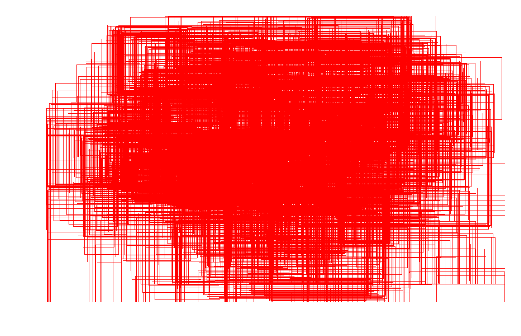

In [8]:
im = Image.new('RGBA', (1300, 800), 'white')

for i in range(len(train)):
    if train['x1'][i] != -1:
        draw = ImageDraw.Draw(im)
        draw.rectangle((train['x1'][i],train['y1'][i],train['x2'][i],train['y2'][i]), fill=None, outline='red')
del draw
plt.imshow(im); plt.axis('off')

#*************Commented due to NDA *************
#im = Image.new('RGBA', (1300, 800), 'white')
#for i in range(len(train)):
#    im_ = Image.open(train['path'][i])
#    if train['x1'][i] != -1:
#        draw = ImageDraw.Draw(im)
#        im.paste(im_.crop((train['x1'][i],train['y1'][i],train['x2'][i],train['y2'][i])), (int(train['x1'][i]),int(train['y1'][i])))
#del draw
#plt.imshow(im); plt.axis('off')

3. Neural Networks (VGG-16)
===================
https://arxiv.org/pdf/1409.1556.pdf

In [9]:
import warnings
warnings.filterwarnings("ignore")
import multiprocessing
import os, glob
#os.environ['THEANO_FLAGS'] = "floatX=float32,openmp=True" 
#os.environ['OMP_NUM_THREADS'] = str(multiprocessing.cpu_count())
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD
from sklearn.model_selection import GridSearchCV, KFold
import pandas as pd
import numpy as np
np.random.seed(1127)
import cv2

train_data = []
train_target = []
folders = ['ALB', 'BET', 'DOL', 'LAG', 'NoF', 'OTHER', 'SHARK', 'YFT']

for i in range(len(train[:10])):
    img = cv2.imread(train['path'][i])
    if train['x1'][i] != -1:
        x0, y0 = train['y1'][i], train['x1'][i]
        x1, y1 = train['y2'][i], train['x2'][i]
        mask = np.zeros(img.shape,np.float32)
        mask[x0:x1, y0:y1] = img[x0:x1, y0:y1]
        mask = cv2.resize(mask, (45, 45), cv2.INTER_LINEAR)
        train_data.append(mask)
        train_target.append(folders.index(train['type'][i]))
    elif train['type'][i] == 'NoF':
        img = cv2.resize(img, (45, 45), cv2.INTER_LINEAR)
        train_data.append(img)
        train_target.append(folders.index(train['type'][i]))
train_data =  np.array(train_data, dtype=np.uint8)
train_data = train_data.transpose((0, 1, 2, 3)).astype('float32') / 255
train_target = np.array(train_target, dtype=np.uint8)


def create_model():
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(45,45,3)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(8, activation='softmax'))
    sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy')
    return model

model = create_model()
callbacks = [EarlyStopping(monitor='val_loss', patience=3, verbose=0),]
model.fit(train_data, train_target, batch_size=20, nb_epoch=5, shuffle=True, verbose=2, validation_data=(train_data[::3], train_target[::3]), callbacks=callbacks)

test_data = []
test_id = []
files = sorted(glob.glob('../input/test_stg1/*.jpg'))

for fl in files[:10]:
    flbase = os.path.basename(fl)
    img = cv2.imread(fl)
    img = cv2.resize(img, (45, 45), cv2.INTER_LINEAR)
    test_data.append(img)
    test_id.append(flbase)
test_data =  np.array(test_data, dtype=np.uint8)
test_data = test_data.transpose((0, 1, 2, 3)).astype('float32') / 255

test_prediction = model.predict(test_data, batch_size=20, verbose=2)
result1 = pd.DataFrame(test_prediction, columns=folders)
result1.loc[:, 'image'] = pd.Series(test_id, index=result1.index)
result1.to_csv('submission.csv', index=False)

Using TensorFlow backend.


Train on 10 samples, validate on 4 samples
Epoch 1/5
3s - loss: 2.0794 - val_loss: 1.8062
Epoch 2/5
2s - loss: 1.8049 - val_loss: 1.3719
Epoch 3/5
2s - loss: 1.3810 - val_loss: 0.8670
Epoch 4/5
2s - loss: 0.8785 - val_loss: 0.3972
Epoch 5/5
2s - loss: 0.4059 - val_loss: 0.1248
